
**DATA PREPROCESSING AND CLEANING**

In [ ]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the data

loan_data = pd.read_csv("loan.csv")

# Know the shape(rows and columns) of the dataframe to understand the number of rows and columns
# print(loan_data.shape)

# To know whether the columns have null values or not.
# print(loan_data.isnull().sum())

# There are a lot of columns with all null values.
# Clean the unwanted columns.

loan_data.dropna(axis = 1, how = 'all', inplace = True)
print(loan_data.head())

# Again know the shape after removing the unwanted columns.
# print(loan_data.shape)

# After the removing the unwanted/NaN columns, check whether any columns have null values
# print(loan_data.isnull().sum())

# Checking the unique values
# If the column has only a single unique value,it does not make any sense to include it as part of our data analysis.
# We need to find out those columns and drop them from the dataset.

remove_single_valued_list = []
for i in loan_data.columns:
    # check if unique value count is 1
    if loan_data[i].nunique() == 1:
        remove_single_valued_list.append(i)

loan_data.drop(remove_single_valued_list,axis=1,inplace=True)

# print(loan_data.shape)

# find whether any duplicate rows exist or not.
print(loan_data[loan_data.duplicated()])

# The loan in progress 'loan_status = Current' cannot provide any insights as to whether the borrower is likely to default or not. Hence, dropping those records.
loan_data = loan_data[loan_data["loan_status"].str.lower() != "current"]
print(loan_data.shape)

# If we observe the Data Dictionary, few dimension columns,which are more descriptive, will not be useful.
# So find out and remove them.
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'addr_state',
 'zip_code'
]
loan_data.drop(drop_cols, axis = 1, inplace = True)

print(loan_data.shape)

# Now findout the columns which have any null values or missing values(%)
print(round(loan_data.isna().sum()/len(loan_data.index)*100))

# with this we can see that mths_since_last_delinq, mths_since_last_record and next_pymnt_d missed most of the records. So remove them
for cols in loan_data.columns:
    missing_values = round(loan_data[cols].isna().sum() / loan_data.shape[0], 2)
    if missing_values >= 0.65:
        loan_data.drop(cols, axis = 1, inplace = True)
print(loan_data.shape)


# Fetch the missing records column- 'emp_length' value count.
print(loan_data['emp_length'].value_counts())
emp_length_mode = loan_data["emp_length"].mode()[0]

# replace the missing values with most occuring value.
loan_data["emp_length"] = loan_data["emp_length"].fillna(emp_length_mode)

# Fetch the missing records column - "pub_rec_bankruptcies" value count.
pub_rec_bankruptcies_median = loan_data["pub_rec_bankruptcies"].median()
# replace the missing values with most occuring value.
loan_data["pub_rec_bankruptcies"] = loan_data["pub_rec_bankruptcies"].fillna(pub_rec_bankruptcies_median)

# still findout whether any data has null/missing values.
# print(loan_data.isna().sum())

# print(loan_data.head())
print(loan_data.term.value_counts())


# fetch any special characters in the "int_rate" and if yes, convert Interest rate to float type
print(loan_data["int_rate"].value_counts())
loan_data["int_rate"] = loan_data["int_rate"].apply(lambda x: x.replace("%",""))
loan_data["int_rate"] = loan_data["int_rate"].astype(float)

# fetch any other data has different type.

print(loan_data.info())

# By looking into the Employee length, it should be in int but the Dtype is object.
# convert that into the int type.
print(loan_data["emp_length"].value_counts())
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))
loan_data["emp_length"] = loan_data["emp_length"].astype(int)
print(loan_data.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code applicat

In [ ]:
loan_data

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000           4975.0   36 months     10.65   
1           2500         2500           2500.0   60 months     15.27   
2           2400         2400           2400.0   36 months     15.96   
3          10000        10000          10000.0   36 months     13.49   
5           5000         5000           5000.0   36 months      7.90   
...          ...          ...              ...         ...       ...   
39712       2500         2500           1075.0   36 months      8.07   
39713       8500         8500            875.0   36 months     10.28   
39714       5000         5000           1325.0   36 months      8.07   
39715       5000         5000            650.0   36 months      7.43   
39716       7500         7500            800.0   36 months     13.75   

       installment grade sub_grade  emp_length home_ownership  annual_inc  \
0           162.87     B        B2          10           RENT     24000.0   
1            59.83     C        C4           0           RENT     30000.0   
2            84.33     C        C5          10           RENT     12252.0   
3           339.31     C        C1          10           RENT     49200.0   
5           156.46     A        A4           3           RENT     36000.0   
...            ...   ...       ...         ...            ...         ...   
39712        78.42     A        A4           4       MORTGAGE    110000.0   
39713       275.38     C        C1           3           RENT     18000.0   
39714       156.84     A        A4           0       MORTGAGE    100000.0   
39715       155.38     A        A2           0       MORTGAGE    200000.0   
39716       255.43     E        E2           0            OWN     22000.0   

      verification_status issue_d  loan_status             purpose    dti  \
0                Verified  Dec-11   Fully Paid         credit_card  27.65   
1         Source Verified  Dec-11  Charged Off                 car   1.00   
2            Not Verified  Dec-11   Fully Paid      small_business   8.72   
3         Source Verified  Dec-11   Fully Paid               other  20.00   
5         Source Verified  Dec-11   Fully Paid             wedding  11.20   
...                   ...     ...          ...                 ...    ...   
39712        Not Verified  Jul-07   Fully Paid    home_improvement  11.33   
39713        Not Verified  Jul-07   Fully Paid         credit_card   6.40   
39714        Not Verified  Jul-07   Fully Paid  debt_consolidation   2.30   
39715        Not Verified  Jul-07   Fully Paid               other   3.72   
39716        Not Verified  Jun-07   Fully Paid  debt_consolidation  14.29   

       pub_rec_bankruptcies  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
5                       0.0  
...                     ...  
39712                   0.0  
39713                   0.0  
39714                   0.0  
39715                   0.0  
39716                   0.0  

[38577 rows x 17 columns]

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  int64  
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                   38

performing catogorical-univarient unorderd analysis

In [ ]:
loan_data["term"].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [ ]:
loan_data["term"].info()

<class 'pandas.core.series.Series'>
Index: 38577 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype 
--------------  ----- 
38577 non-null  object
dtypes: object(1)
memory usage: 602.8+ KB


In [ ]:
c=loan_data["term"].value_counts()

**UNIVARIENT ANALYSIS**

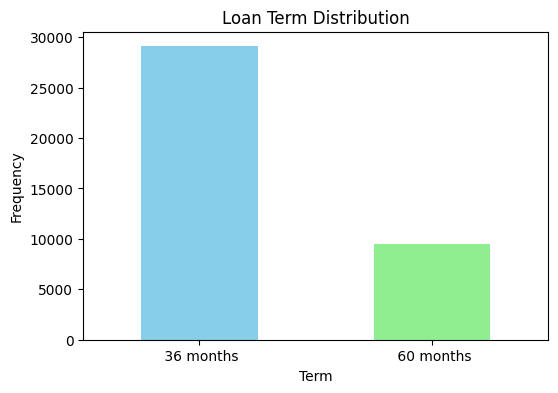

In [ ]:
# Bar plot
plt.figure(figsize=(6, 4))
c.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Loan Term Distribution")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


In the analysis, the 36-month term appears significantly more frequently than the 60-month term. This suggests a customer preference for shorter-term loans or possibly lending practices that favor shorter loan durations.

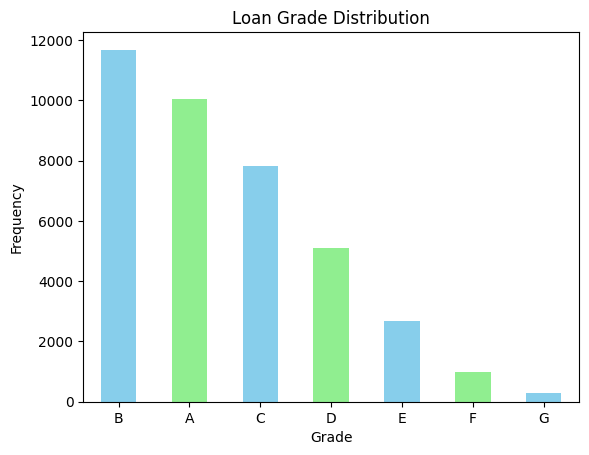

In [ ]:
loan_data["grade"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Loan Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In [ ]:
loan_data["sub_grade"].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

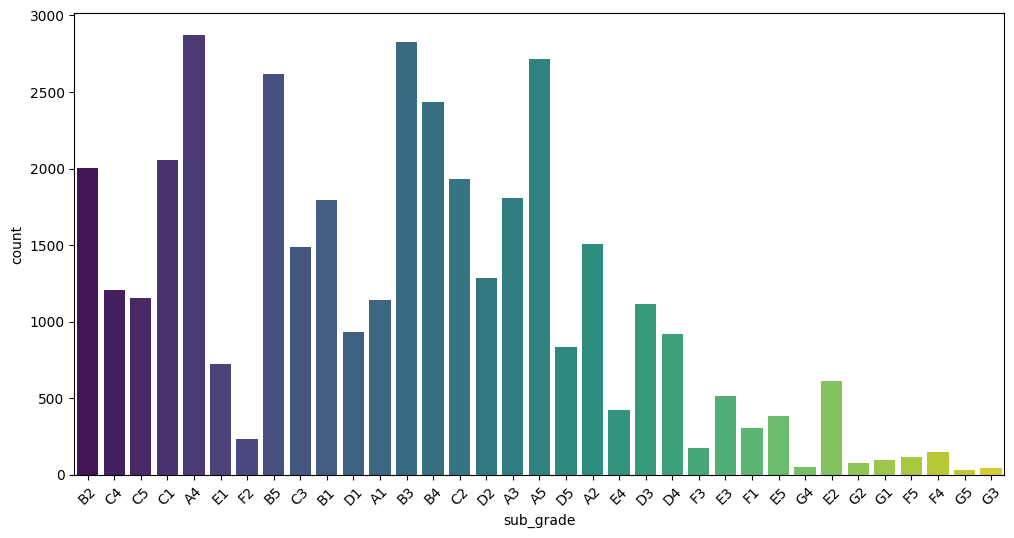

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.countplot(data=loan_data, x='sub_grade', palette='viridis')  # Create countplot
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

In [ ]:
loan_data["home_ownership"].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

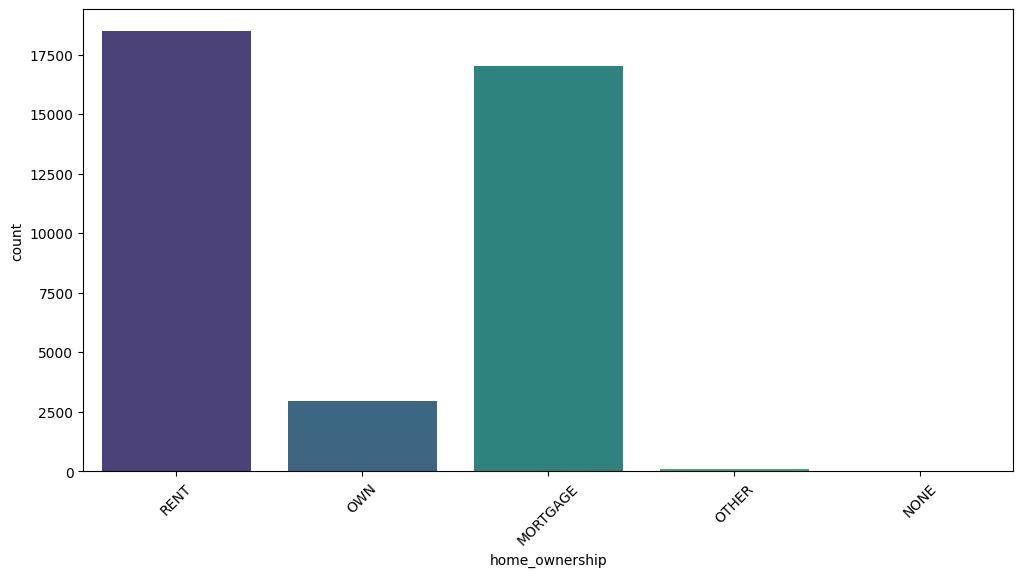

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.countplot(data=loan_data, x='home_ownership', palette='viridis')  # Create countplot
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

In [ ]:
 11  verification_status   38577 non-null  object
 12  issue_d               38577 non-null  object
 13  loan_status           38577 non-null  object
 14  purpose               38577 non-null  object

In [ ]:
loan_data["verification_status"].value_counts()


verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

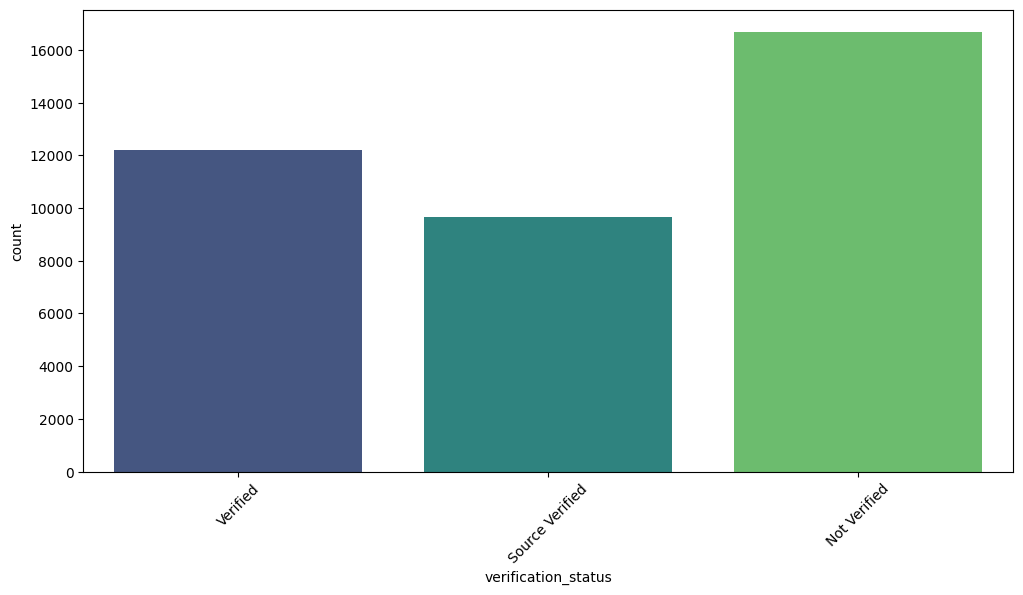

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.countplot(data=loan_data, x='verification_status', palette='viridis')  # Create countplot
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

In [ ]:
loan_data["issue_d"].value_counts()


issue_d
Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

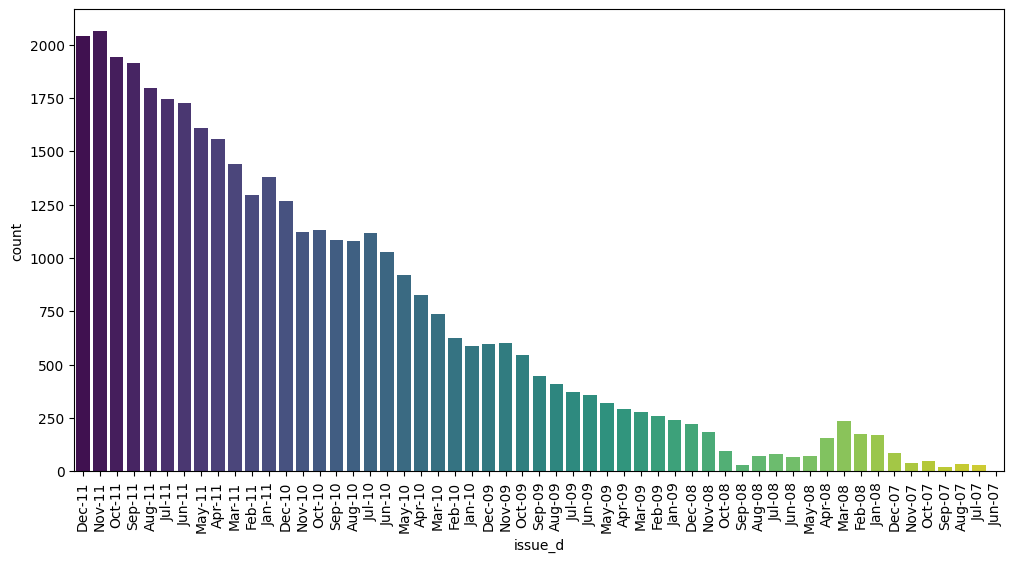

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.countplot(data=loan_data, x='issue_d', palette='viridis')  # Create countplot
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  int64  
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                   38

In [ ]:
loan_data["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

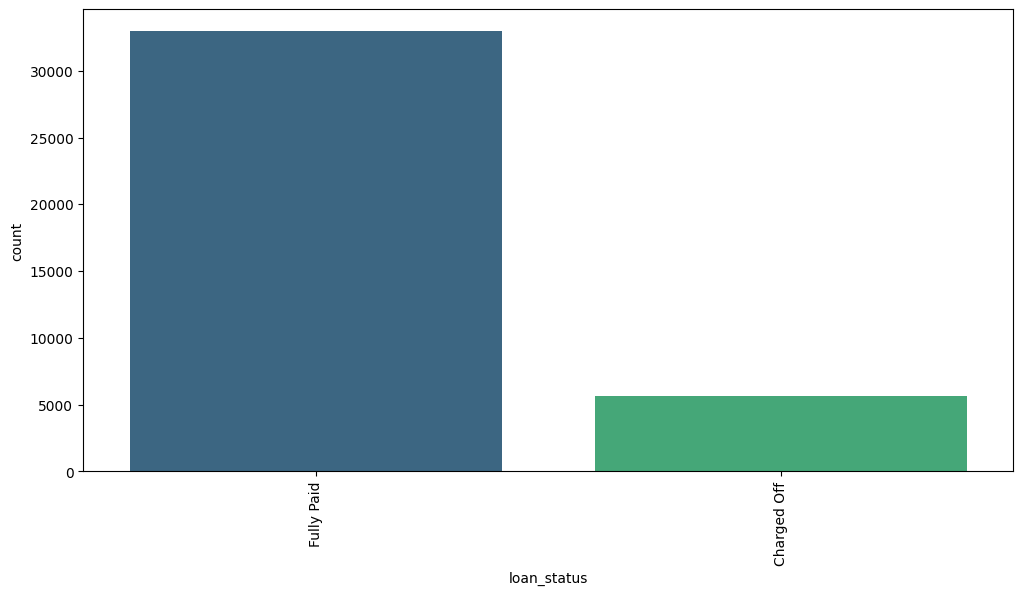

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.countplot(data=loan_data, x='loan_status', palette='viridis')  # Create countplot
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  int64  
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                   38

In [ ]:
loan_data["purpose"].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

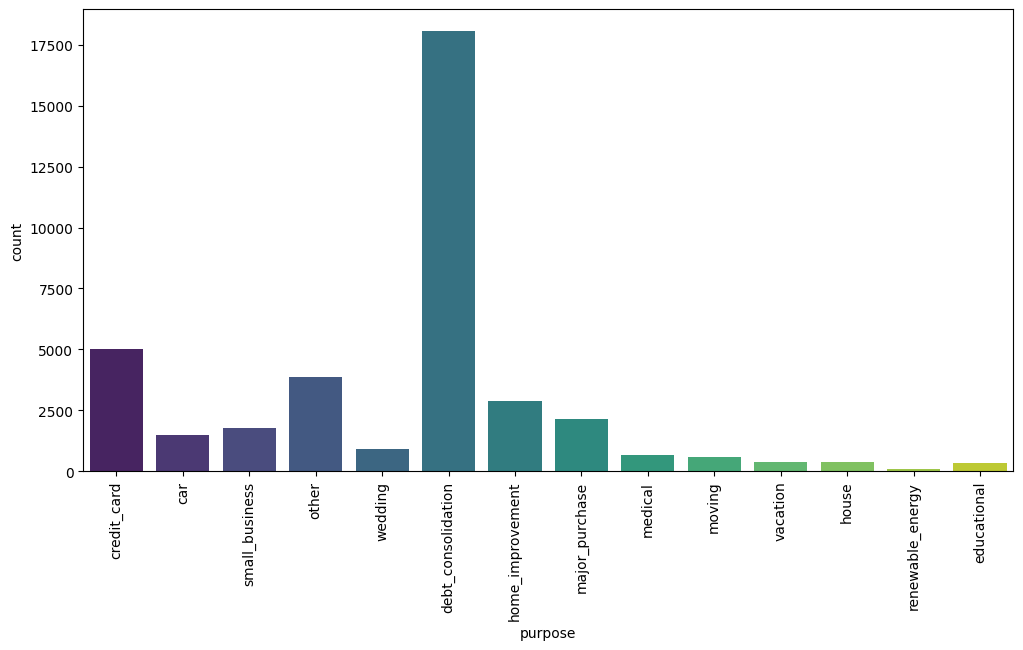

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.countplot(data=loan_data, x='purpose', palette='viridis')  # Create countplot
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

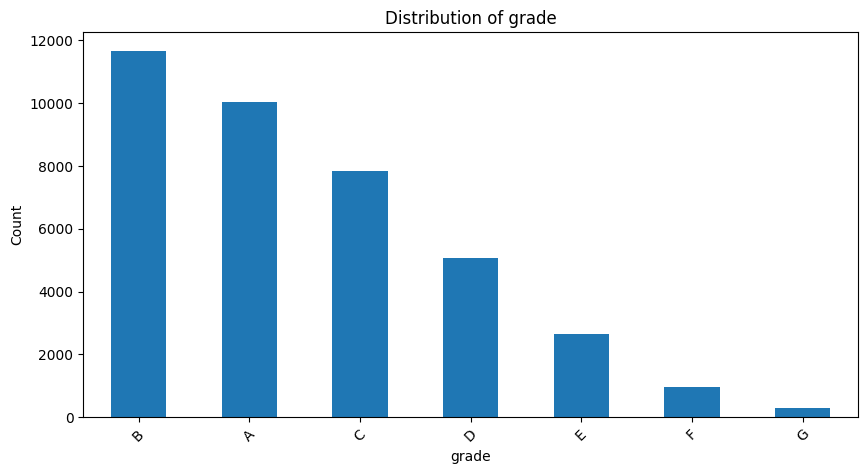

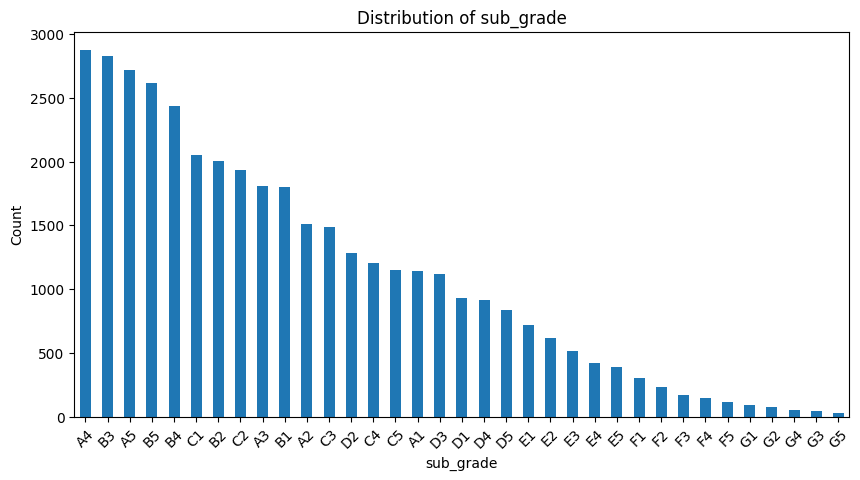

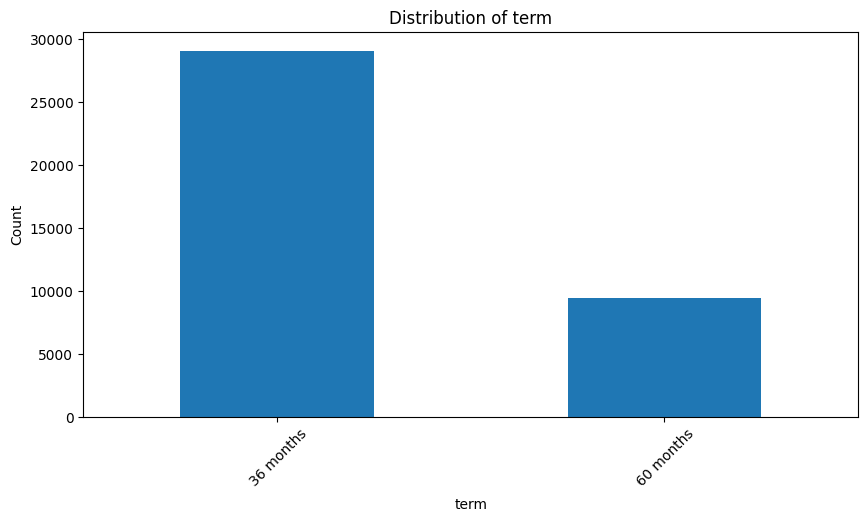

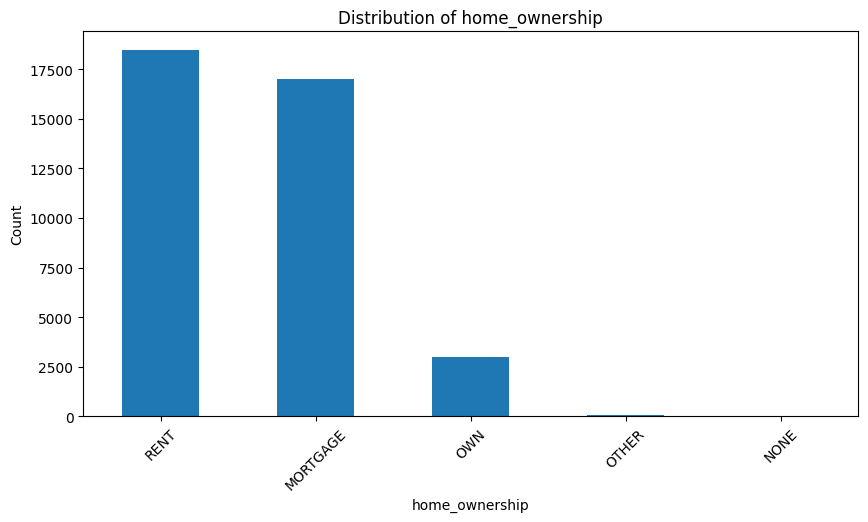

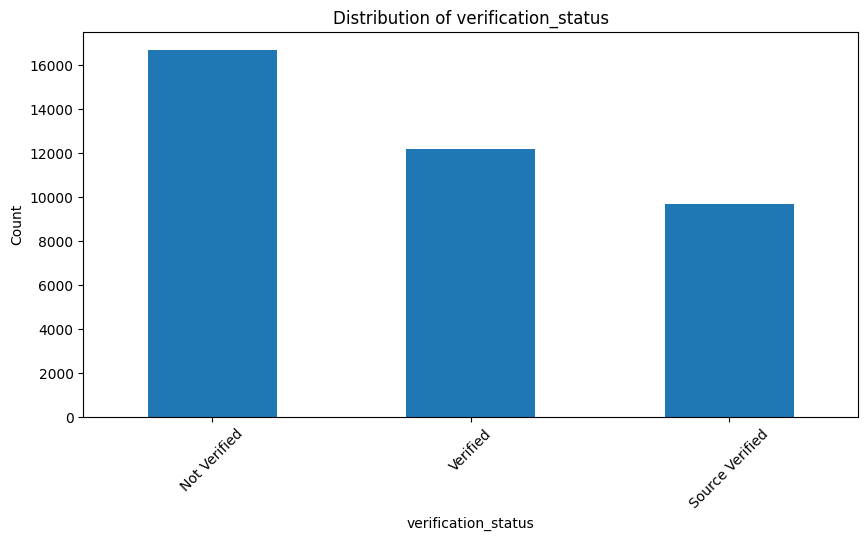

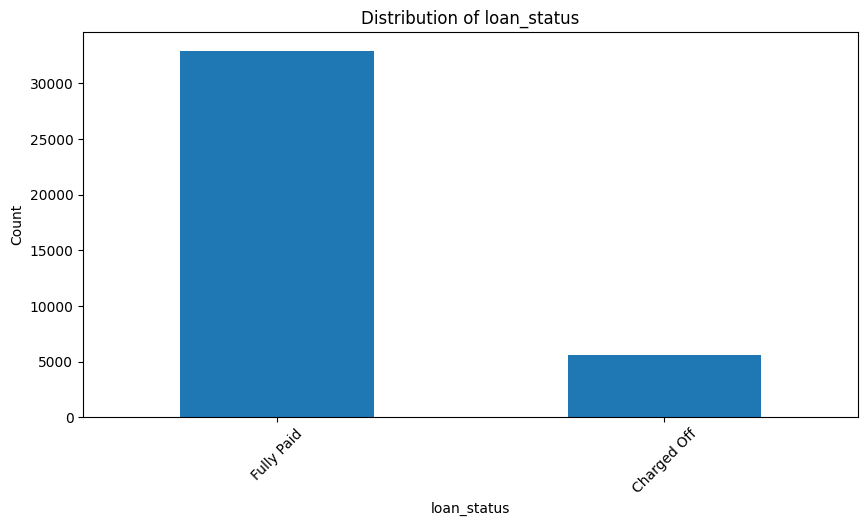

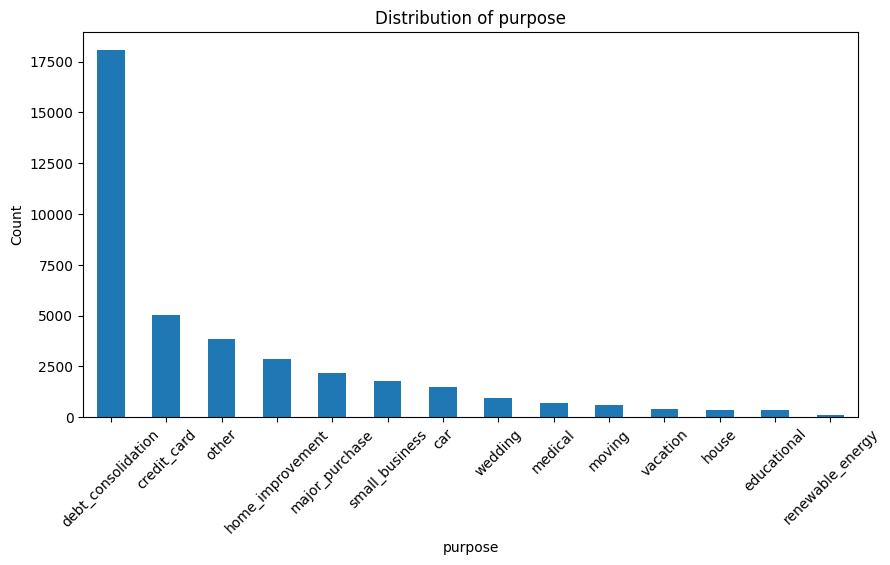

In [ ]:
categorical_columns = ['grade', 'sub_grade', 'term', 'home_ownership', 'verification_status', 'loan_status', 'purpose']

# Loop through each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    loan_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

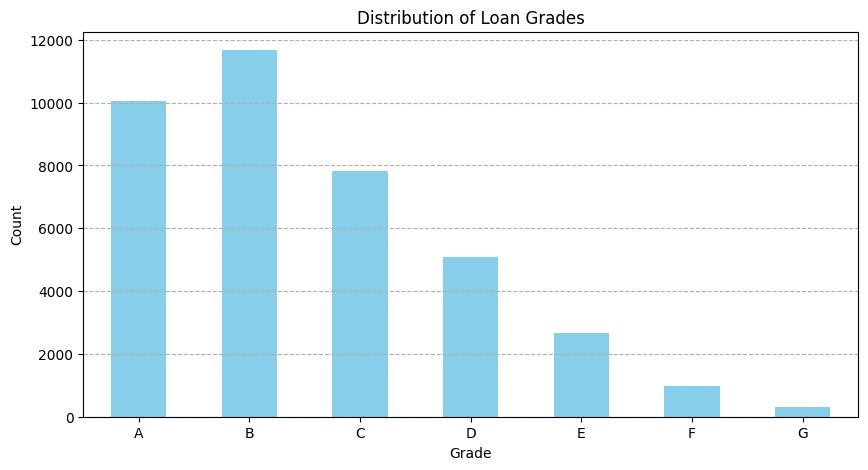

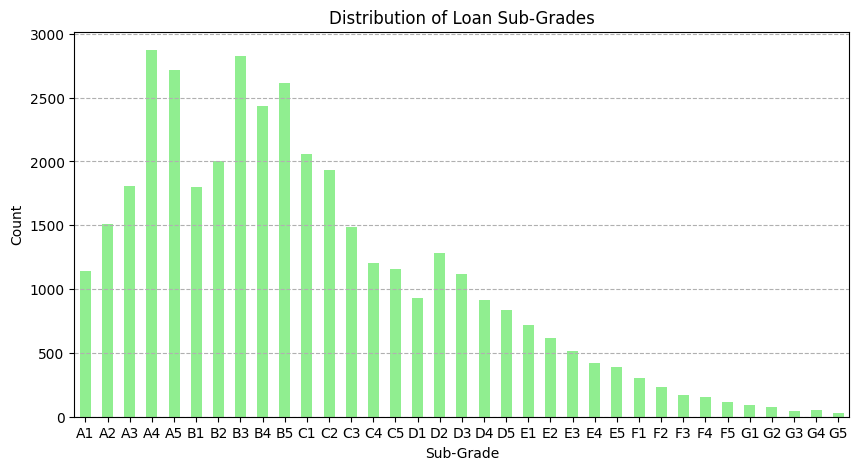

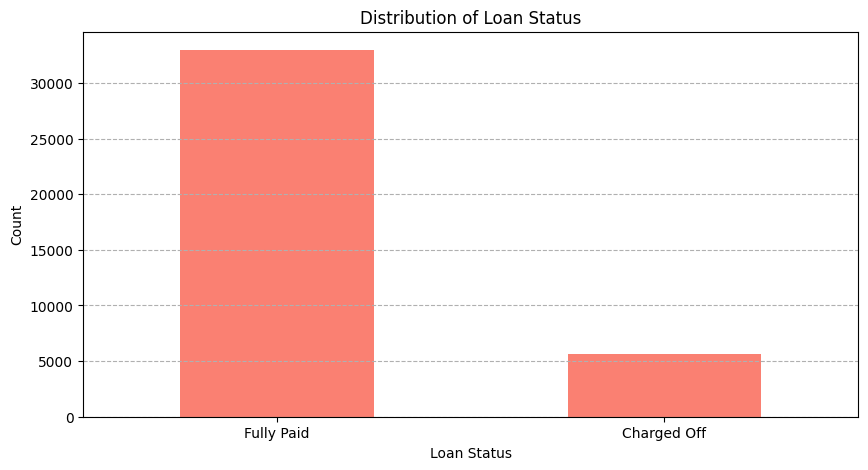

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming loan_data is your DataFrame
# loan_data = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line if needed

# Define ordered categories for grades and sub_grades
ordered_grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
ordered_sub_grades = [f'{grade}{i}' for grade in ordered_grades for i in range(1, 6)]

# **1. Analyze Grade**
grade_counts = loan_data['grade'].value_counts().reindex(ordered_grades)

plt.figure(figsize=(10, 5))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# **2. Analyze Sub_Grade**
sub_grade_counts = loan_data['sub_grade'].value_counts().reindex(ordered_sub_grades)

plt.figure(figsize=(10, 5))
sub_grade_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Loan Sub-Grades')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# **3. Analyze Loan Status**
loan_status_counts = loan_data['loan_status'].value_counts()

plt.figure(figsize=(10, 5))
loan_status_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


**BIVARIENT ANALYSIS**

          loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123     11.932219   
std     7348.441646   7090.306027      7022.720644      3.691327   
min      500.000000    500.000000         0.000000      5.420000   
25%     5300.000000   5200.000000      5000.000000      8.940000   
50%     9600.000000   9550.000000      8733.440000     11.710000   
75%    15000.000000  15000.000000     14000.000000     14.380000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment    annual_inc           dti  pub_rec_bankruptcies  
count  38577.000000  3.857700e+04  38577.000000          38577.000000  
mean     322.466318  6.877797e+04     13.272727              0.042694  
std      208.639215  6.421868e+04      6.673044              0.202809  
min       15.690000  4.000000e+03      0.000000              0.000000  
25%      165.740000  4.0000

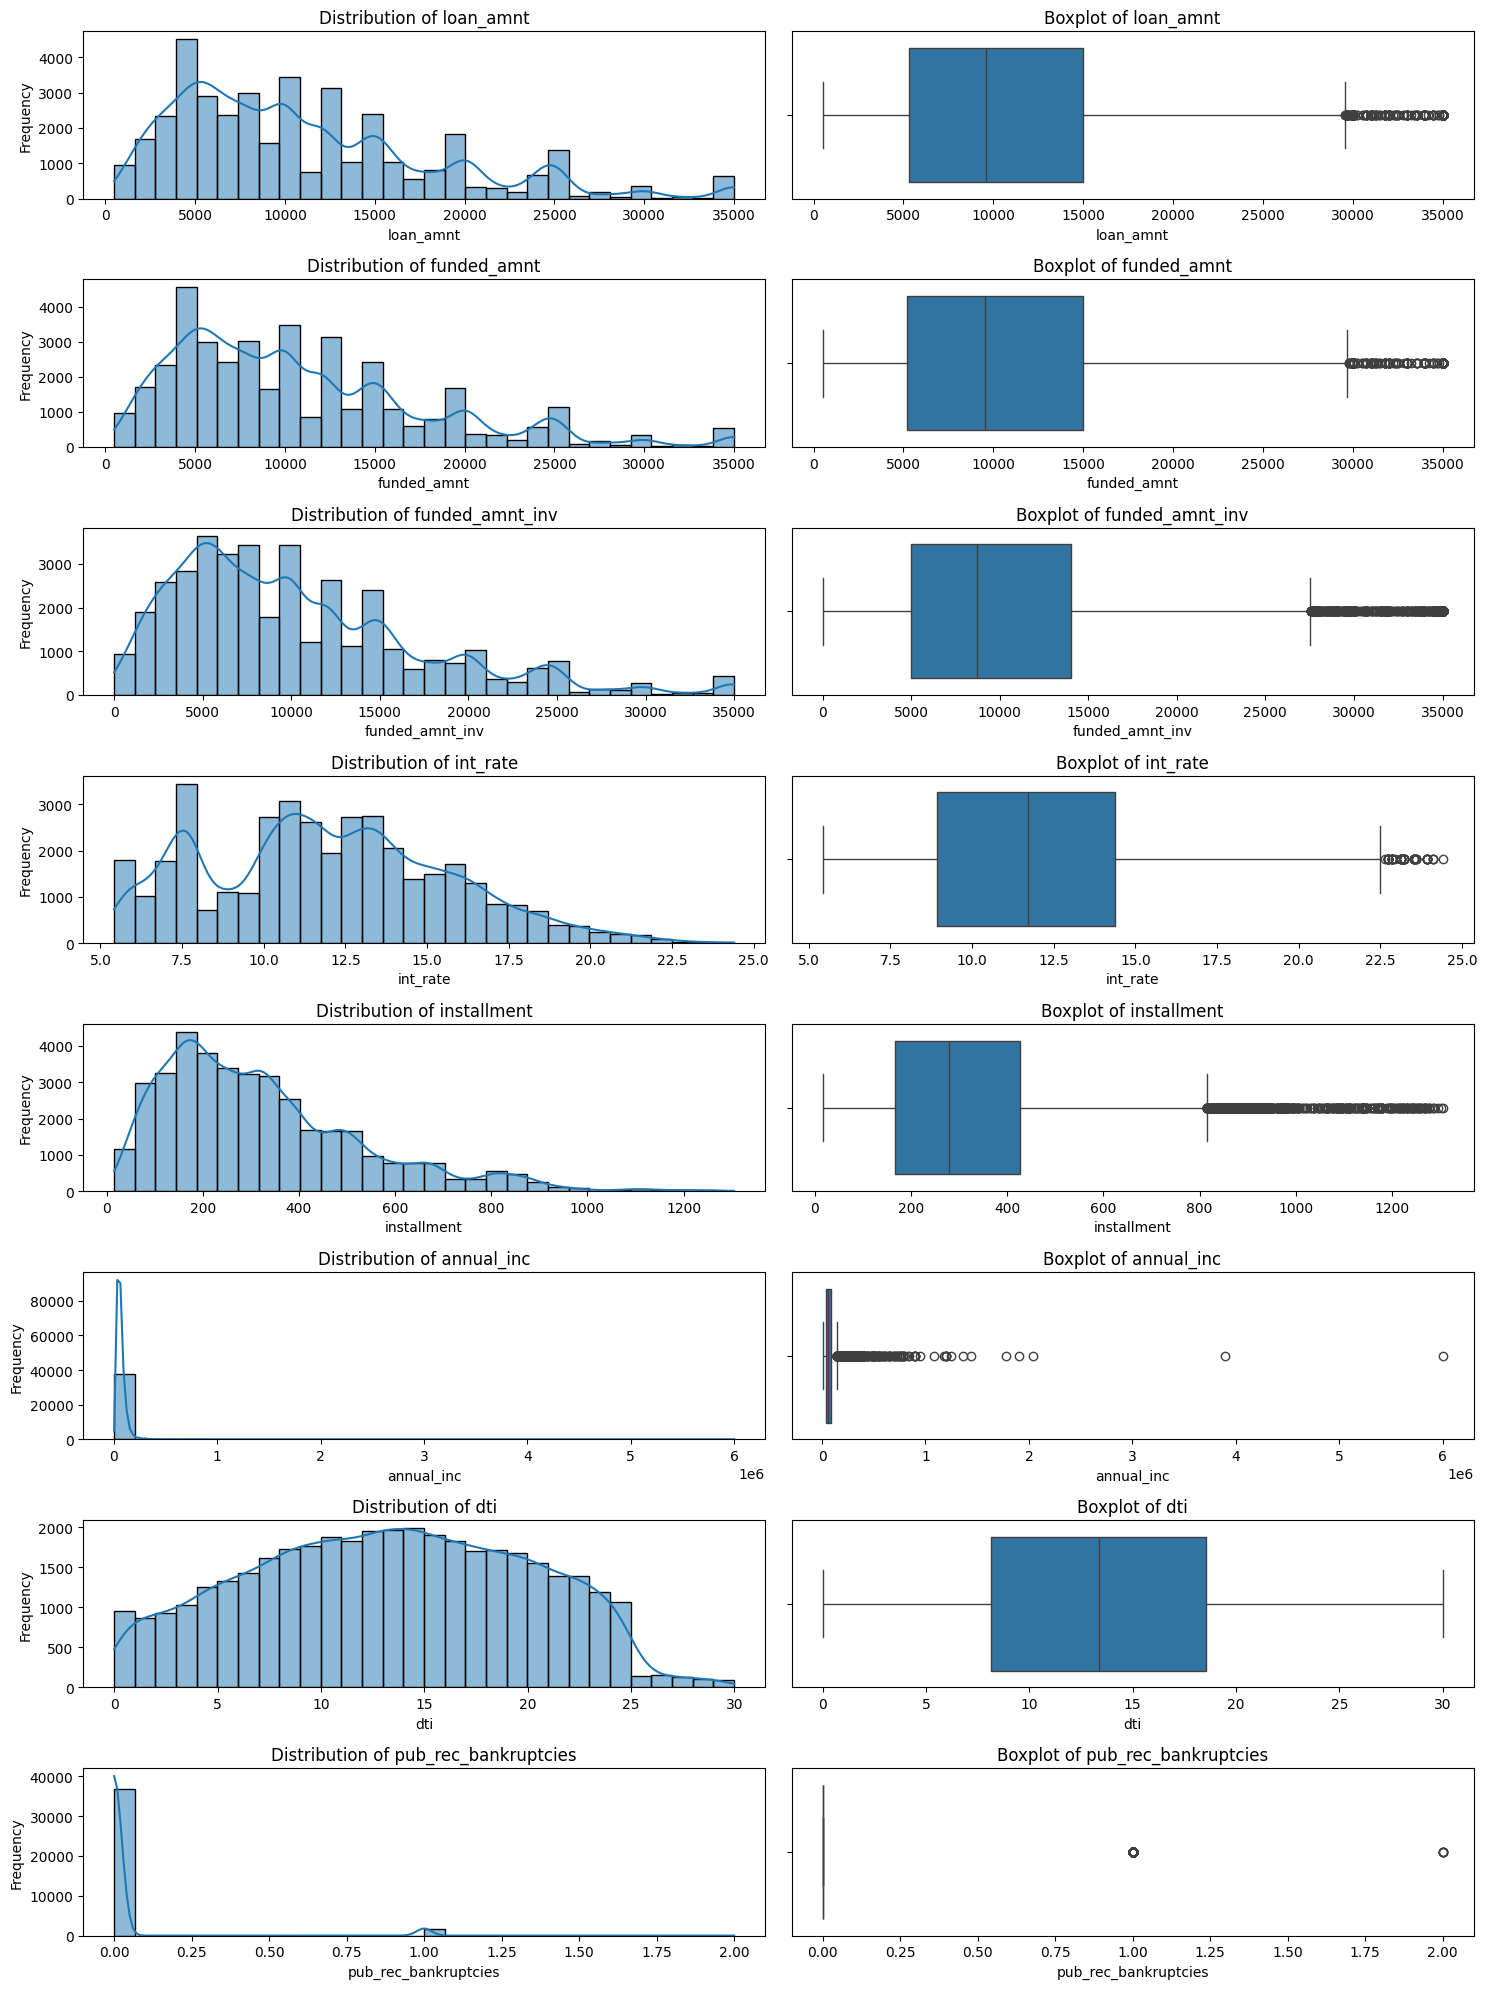

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# List of quantitative variables to analyze
quantitative_vars = [
    'loan_amnt',
    'funded_amnt',
    'funded_amnt_inv',
    'int_rate',
    'installment',
    'annual_inc',
    'dti',
    'pub_rec_bankruptcies'
]

# **1. Descriptive Statistics**
descriptive_stats = loan_data[quantitative_vars].describe()
print(descriptive_stats)

# **2. Distribution Visualization**
plt.figure(figsize=(15, 20))

for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(len(quantitative_vars), 2, i*2-1)
    sns.histplot(loan_data[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    plt.subplot(len(quantitative_vars), 2, i*2)
    sns.boxplot(x=loan_data[var])
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  int64  
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                   38

**SEGMENTED UNIVARIENT ANALYSIS**


Summary Statistics grouped by 'grade':

loan_amnt - Mean:
grade
A     8618.758089
B    10934.783726
C    10815.518892
D    12137.767945
E    15680.116410
F    18095.235656
G    20253.010033
Name: loan_amnt, dtype: float64
loan_amnt - Median:
grade
A     7500.0
B    10000.0
C     9600.0
D    10000.0
E    15000.0
F    18000.0
G    20500.0
Name: loan_amnt, dtype: float64

int_rate - Mean:
grade
A     7.330979
B    11.007782
C    13.533565
D    15.661282
E    17.630364
F    19.643494
G    21.312308
Name: int_rate, dtype: float64
int_rate - Median:
grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.36
G    20.90
Name: int_rate, dtype: float64

annual_inc - Mean:
grade
A    66681.565741
B    67561.088141
C    67731.499824
D    68283.875176
E    77791.061491
F    83482.034457
G    94273.316087
Name: annual_inc, dtype: float64
annual_inc - Median:
grade
A    57700.0
B    57600.0
C    55281.0
D    59000.0
E    65000.0
F    72000.0
G    80000.0
Name: annual_inc, dtype: float64

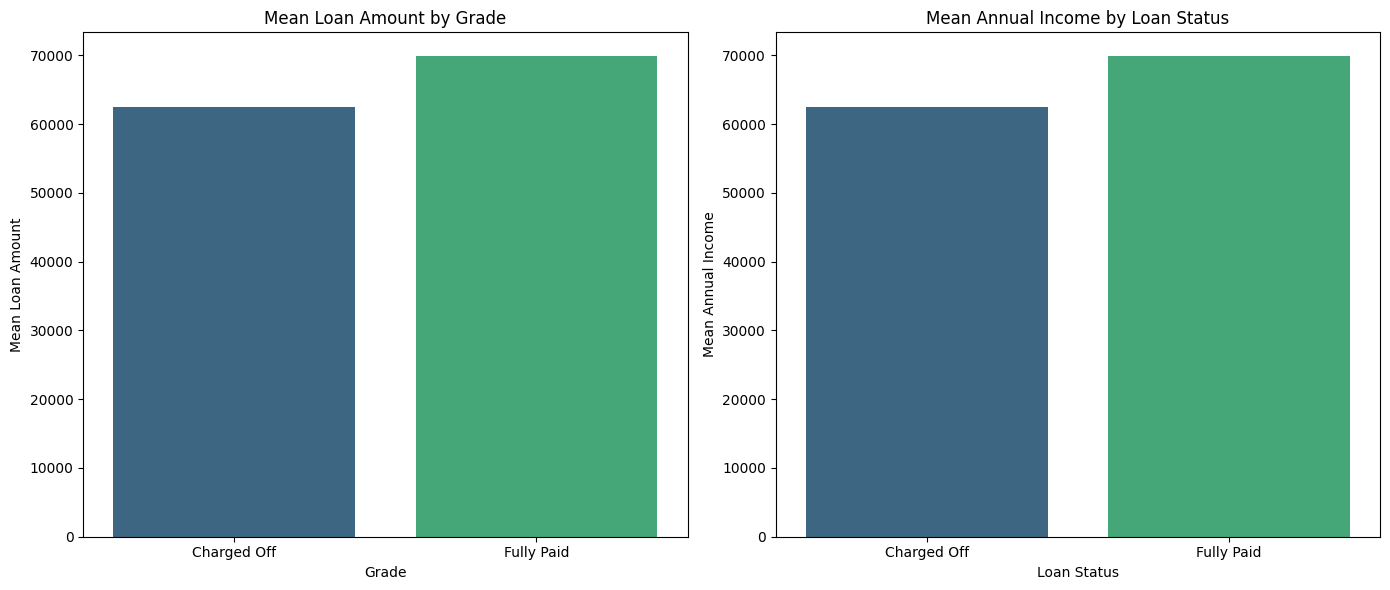

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# **Step 1: Choose categorical and quantitative variables**
categorical_vars = ['grade', 'loan_status']  # Example categorical variables
quantitative_vars = ['loan_amnt', 'int_rate', 'annual_inc']  # Example quantitative variables

# **Step 2: Group the Data and Summarize**
summary_stats = {}

for cat_var in categorical_vars:
    summary_stats[cat_var] = {}
    for quant_var in quantitative_vars:
        # Calculate mean and median for each group
        mean_value = loan_data.groupby(cat_var)[quant_var].mean()
        median_value = loan_data.groupby(cat_var)[quant_var].median()

        summary_stats[cat_var][quant_var] = {
            'mean': mean_value,
            'median': median_value
        }

# **Display the Summary Statistics**
for cat_var, stats in summary_stats.items():
    print(f"\nSummary Statistics grouped by '{cat_var}':")
    for quant_var, values in stats.items():
        print(f"\n{quant_var} - Mean:\n{values['mean']}")
        print(f"{quant_var} - Median:\n{values['median']}")

# **Step 3: Visual Comparison of Aggregated Metrics**
# Visualizing Mean Loan Amount by Grade and Loan Status
plt.figure(figsize=(14, 6))

# Mean Loan Amount by Grade
plt.subplot(1, 2, 1)
sns.barplot(x=mean_value.index, y=mean_value.values, palette='viridis')
plt.title('Mean Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Mean Loan Amount')

# Mean Annual Income by Loan Status
mean_income = loan_data.groupby('loan_status')['annual_inc'].mean()
plt.subplot(1, 2, 2)
sns.barplot(x=mean_income.index, y=mean_income.values, palette='viridis')
plt.title('Mean Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Mean Annual Income')

plt.tight_layout()
plt.show()


**BIVARIENT ANALYSIS**

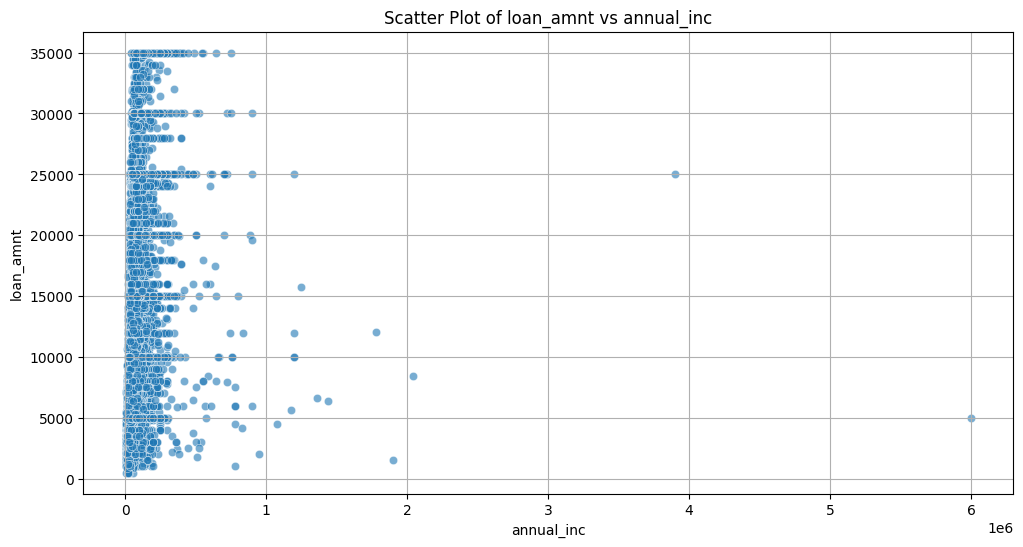

Correlation between annual_inc and loan_amnt: 0.27


In [ ]:
# **Step 1: Choose Continuous Variables for Analysis**
x_var = 'annual_inc'  # Independent variable
y_var = 'loan_amnt'  # Dependent variable

# **Step 2: Visualize the Relationship**
plt.figure(figsize=(12, 6))
sns.scatterplot(data=loan_data, x=x_var, y=y_var, alpha=0.6)
plt.title(f'Scatter Plot of {y_var} vs {x_var}')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.grid()
plt.show()

# **Step 3: Calculate Correlation**
correlation = loan_data[x_var].corr(loan_data[y_var])
print(f'Correlation between {x_var} and {y_var}: {correlation:.2f}')

In [ ]:
loan_data

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000           4975.0   36 months     10.65   
1           2500         2500           2500.0   60 months     15.27   
2           2400         2400           2400.0   36 months     15.96   
3          10000        10000          10000.0   36 months     13.49   
5           5000         5000           5000.0   36 months      7.90   
...          ...          ...              ...         ...       ...   
39712       2500         2500           1075.0   36 months      8.07   
39713       8500         8500            875.0   36 months     10.28   
39714       5000         5000           1325.0   36 months      8.07   
39715       5000         5000            650.0   36 months      7.43   
39716       7500         7500            800.0   36 months     13.75   

       installment grade sub_grade  emp_length home_ownership  annual_inc  \
0           162.87     B        B2          10           RENT     24000.0   
1            59.83     C        C4           0           RENT     30000.0   
2            84.33     C        C5          10           RENT     12252.0   
3           339.31     C        C1          10           RENT     49200.0   
5           156.46     A        A4           3           RENT     36000.0   
...            ...   ...       ...         ...            ...         ...   
39712        78.42     A        A4           4       MORTGAGE    110000.0   
39713       275.38     C        C1           3           RENT     18000.0   
39714       156.84     A        A4           0       MORTGAGE    100000.0   
39715       155.38     A        A2           0       MORTGAGE    200000.0   
39716       255.43     E        E2           0            OWN     22000.0   

      verification_status issue_d  loan_status             purpose    dti  \
0                Verified  Dec-11   Fully Paid         credit_card  27.65   
1         Source Verified  Dec-11  Charged Off                 car   1.00   
2            Not Verified  Dec-11   Fully Paid      small_business   8.72   
3         Source Verified  Dec-11   Fully Paid               other  20.00   
5         Source Verified  Dec-11   Fully Paid             wedding  11.20   
...                   ...     ...          ...                 ...    ...   
39712        Not Verified  Jul-07   Fully Paid    home_improvement  11.33   
39713        Not Verified  Jul-07   Fully Paid         credit_card   6.40   
39714        Not Verified  Jul-07   Fully Paid  debt_consolidation   2.30   
39715        Not Verified  Jul-07   Fully Paid               other   3.72   
39716        Not Verified  Jun-07   Fully Paid  debt_consolidation  14.29   

       pub_rec_bankruptcies  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
5                       0.0  
...                     ...  
39712                   0.0  
39713                   0.0  
39714                   0.0  
39715                   0.0  
39716                   0.0  

[38577 rows x 17 columns]

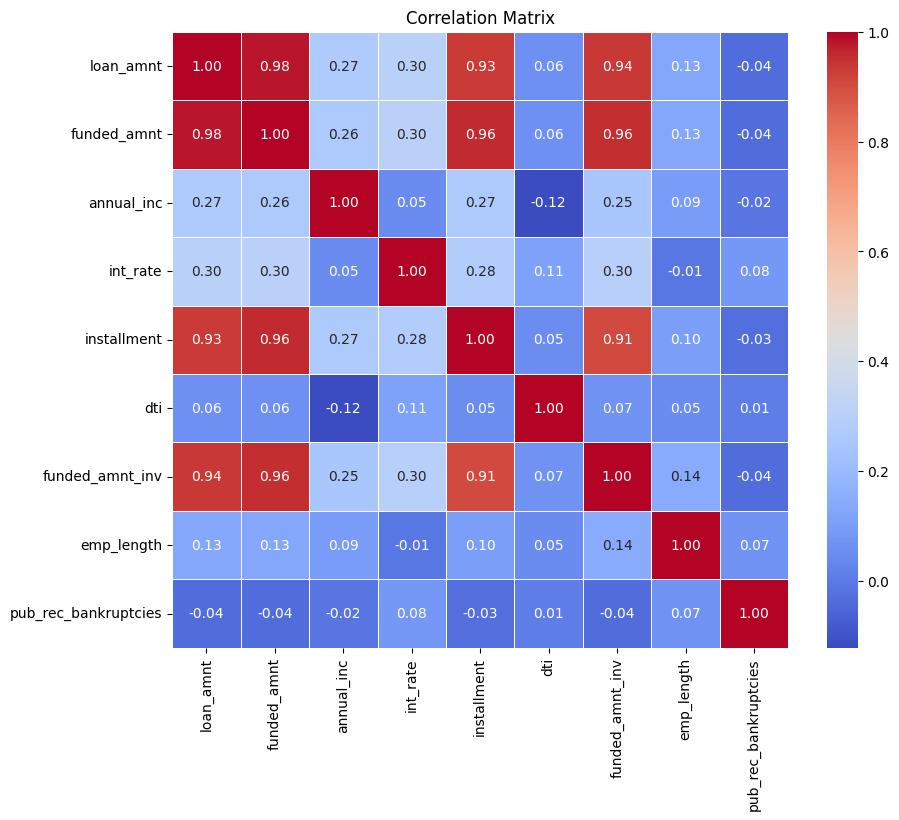

In [ ]:
continuous_vars = ['loan_amnt', 'funded_amnt', 'annual_inc', 'int_rate', 'installment', 'dti','funded_amnt_inv','emp_length','pub_rec_bankruptcies']

# **Step 2: Calculate the Correlation Matrix**
correlation_matrix = loan_data[continuous_vars].corr()

# **Step 3: Visualize the Correlation Matrix**
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  int64  
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                   38

In [ ]:
import pandas as pd



# **Step 1: Comparing Averages**
average_loan_amount = loan_data.groupby('loan_status')['loan_amnt'].mean().reset_index()
fund_avg=loan_data.groupby('loan_status')['funded_amnt'].mean().reset_index()

average_loan_amount.columns = ['Loan Status', 'Average Loan Amount']

print("Average Loan Amount by Loan Status:")
print(average_loan_amount)


Average Loan Amount by Loan Status:
   Loan Status  Average Loan Amount
0  Charged Off         12104.385108
1   Fully Paid         10866.455994


In [ ]:
# Calculate the average interest rate by loan status
int_rate_avg = loan_data.groupby('loan_status')['int_rate'].mean().reset_index()
print("Average interest rate by loan status:")
print(int_rate_avg)

# Plotting the average interest rate by loan status
plt.figure(figsize=(10, 6))
sns.barplot(data=int_rate_avg, x='loan_status', y='int_rate', palette="coolwarm")
plt.title("Average Interest Rate by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Average Interest Rate (%)")
plt.xticks(rotation=45)
plt.show()

# Calculate the average funded amount by both grade and loan status
funded_grade_status = loan_data.groupby(['grade', 'loan_status'])['funded_amnt'].mean().unstack()
print("Funded amount by grade and loan status:")
print(funded_grade_status)

# Plotting the average funded amount by grade and loan status
funded_grade_status.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="Spectral")
plt.title("Funded Amount by Grade and Loan Status")
plt.xlabel("Grade")
plt.ylabel("Average Funded Amount")
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of debt-to-income ratio (DTI) by loan status
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data, x='loan_status', y='dti', palette="Blues")
plt.title("Distribution of Debt-to-Income Ratio by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("DTI Ratio")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Remove outliers using IQR method
for col in numerical_cols:
    Q1 = loan_data[col].quantile(0.25)
    Q3 = loan_data[col].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering the DataFrame to exclude outliers
    loan_data = loan_data[~((loan_data[col] < (Q1 - 1.5 * IQR)) | (loan_data[col] > (Q3 + 1.5 * IQR)))]

# Display data after removing outliers
print("Data after removing outliers:")
print(loan_data)

# Plot the distributions after outlier removal for numerical columns
for col in numerical_cols:
    print(f"\nAnalysis for {col} after outlier removal:")
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(loan_data[col], kde=True, ax=ax[0])
    ax[0].set_title(f'Distribution of {col} (After Outlier Removal)')
    sns.boxplot(x=loan_data[col], ax=ax[1])
    ax[1].set_title(f'Box Plot of {col} (After Outlier Removal)')
    plt.show()

**DERIVED COLUMNS**

In [ ]:
loan_data['loan_to_income_ratio'] = loan_data['loan_amnt'] / loan_data['annual_inc']
loan_data['term_in_months'] = loan_data['term'].apply(lambda x: int(x.split()[0]))
loan_data['total_paid'] = loan_data['installment'] * loan_data['term_in_months']
loan_data['interest_amount'] = loan_data['total_paid'] - loan_data['loan_amnt']
loan_data['is_long_term'] = loan_data['term'].apply(lambda x: 1 if x == '60 months' else 0)
loan_data['income_per_month'] = loan_data['annual_inc'] / 12
loan_data['employment_verified'] = loan_data['verification_status'].apply(lambda x: 1 if x in ['Verified', 'Source Verified'] else 0)
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
loan_data['risk_grade'] = loan_data['grade'].map(grade_mapping)
loan_data['remaining_funded'] = loan_data['funded_amnt'] - loan_data['funded_amnt_inv']

# Display the updated DataFrame with derived columns
print(loan_data)

       loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000           4975.0   36 months     10.65   
1           2500         2500           2500.0   60 months     15.27   
2           2400         2400           2400.0   36 months     15.96   
3          10000        10000          10000.0   36 months     13.49   
5           5000         5000           5000.0   36 months      7.90   
...          ...          ...              ...         ...       ...   
39711       5000         5000            700.0   36 months      8.70   
39712       2500         2500           1075.0   36 months      8.07   
39713       8500         8500            875.0   36 months     10.28   
39714       5000         5000           1325.0   36 months      8.07   
39716       7500         7500            800.0   36 months     13.75   

       installment grade sub_grade  emp_length home_ownership  ...  \
0           162.87     B        B2          10           RENT  ..

In [ ]:
loan_data['loan_to_income_ratio'] = loan_data['loan_amnt'] / loan_data['annual_inc']
loan_data['term_in_months'] = loan_data['term'].apply(lambda x: int(x.split()[0]))
loan_data['total_paid'] = loan_data['installment'] * loan_data['term_in_months']
loan_data['interest_amount'] = loan_data['total_paid'] - loan_data['loan_amnt']
loan_data['is_long_term'] = loan_data['term'].apply(lambda x: 1 if x == '60 months' else 0)
loan_data['income_per_month'] = loan_data['annual_inc'] / 12
loan_data['employment_verified'] = loan_data['verification_status'].apply(lambda x: 1 if x in ['Verified', 'Source Verified'] else 0)
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
loan_data['risk_grade'] = loan_data['grade'].map(grade_mapping)
loan_data['remaining_funded'] = loan_data['funded_amnt'] - loan_data['funded_amnt_inv']

# Display the updated DataFrame with derived columns
print(loan_data)

In [ ]:
loan_data

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000           4975.0   36 months     10.65   
1           2500         2500           2500.0   60 months     15.27   
2           2400         2400           2400.0   36 months     15.96   
3          10000        10000          10000.0   36 months     13.49   
5           5000         5000           5000.0   36 months      7.90   
...          ...          ...              ...         ...       ...   
39711       5000         5000            700.0   36 months      8.70   
39712       2500         2500           1075.0   36 months      8.07   
39713       8500         8500            875.0   36 months     10.28   
39714       5000         5000           1325.0   36 months      8.07   
39716       7500         7500            800.0   36 months     13.75   

       installment grade sub_grade  emp_length home_ownership  ...  \
0           162.87     B        B2          10           RENT  ...   
1            59.83     C        C4           0           RENT  ...   
2            84.33     C        C5          10           RENT  ...   
3           339.31     C        C1          10           RENT  ...   
5           156.46     A        A4           3           RENT  ...   
...            ...   ...       ...         ...            ...  ...   
39711       158.30     B        B1           5       MORTGAGE  ...   
39712        78.42     A        A4           4       MORTGAGE  ...   
39713       275.38     C        C1           3           RENT  ...   
39714       156.84     A        A4           0       MORTGAGE  ...   
39716       255.43     E        E2           0            OWN  ...   

       pub_rec_bankruptcies loan_to_income_ratio term_in_months total_paid  \
0                       0.0             0.208333             36    5863.32   
1                       0.0             0.083333             60    3589.80   
2                       0.0             0.195886             36    3035.88   
3                       0.0             0.203252             36   12215.16   
5                       0.0             0.138889             36    5632.56   
...                     ...                  ...            ...        ...   
39711                   0.0             0.066667             36    5698.80   
39712                   0.0             0.022727             36    2823.12   
39713                   0.0             0.472222             36    9913.68   
39714                   0.0             0.050000             36    5646.24   
39716                   0.0             0.340909             36    9195.48   

      interest_amount  is_long_term  income_per_month  employment_verified  \
0              863.32             0       2000.000000                    1   
1             1089.80             0       2500.000000                    1   
2              635.88             0       1021.000000                    0   
3             2215.16             0       4100.000000                    1   
5              632.56             0       3000.000000                    1   
...               ...           ...               ...                  ...   
39711          698.80             0       6250.000000                    0   
39712          323.12             0       9166.666667                    0   
39713         1413.68             0       1500.000000                    0   
39714          646.24             0       8333.333333                    0   
39716         1695.48             0       1833.333333                    0   

       risk_grade  remaining_funded  
0               2              25.0  
1               3               0.0  
2               3               0.0  
3               3               0.0  
5               1               0.0  
...           ...               ...  
39711           2            4300.0  
39712           1            1425.0  
39713           3            7625.0  
39714           1            3675.0  
39716    

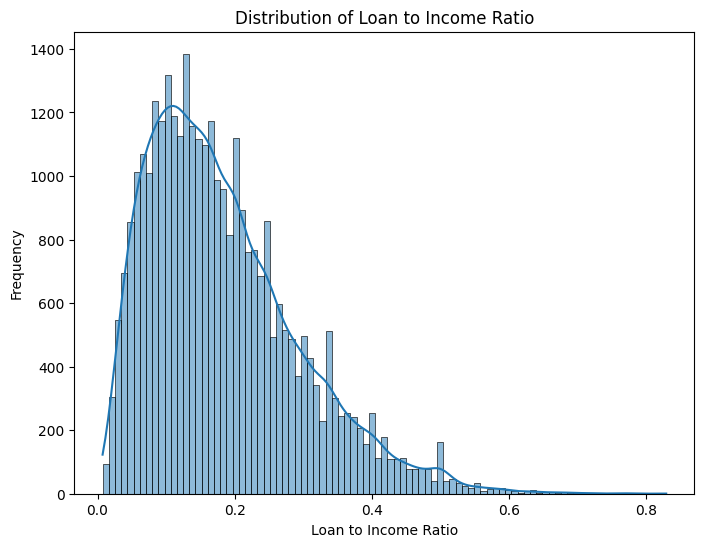

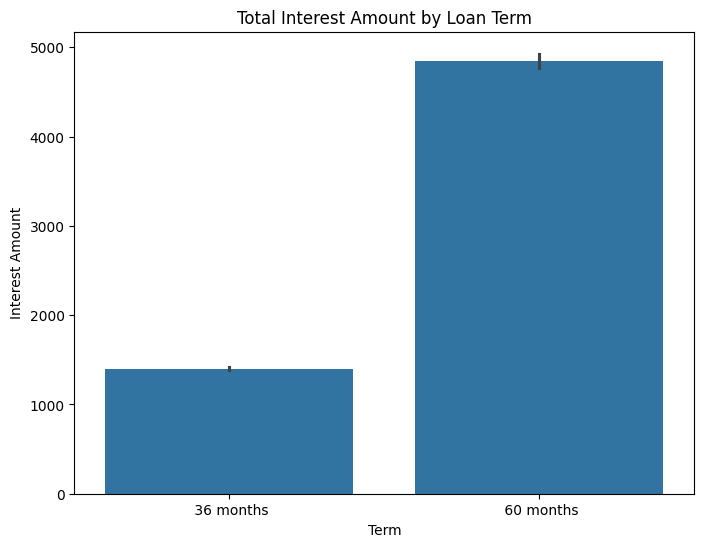

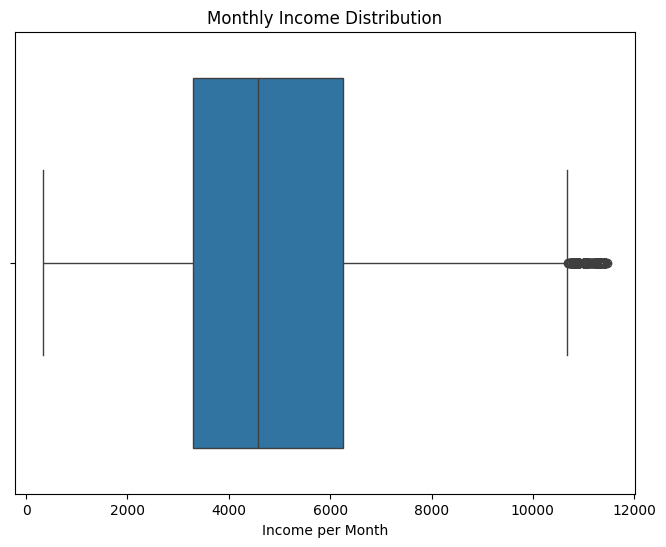

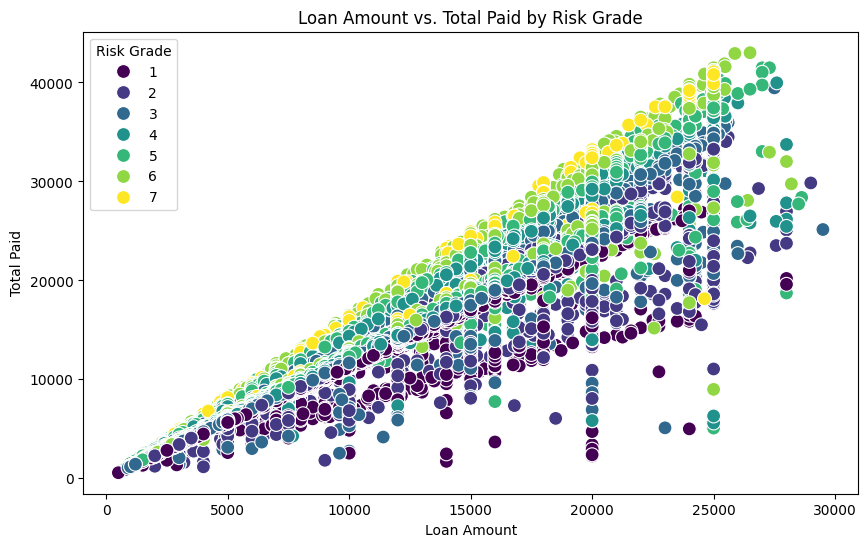

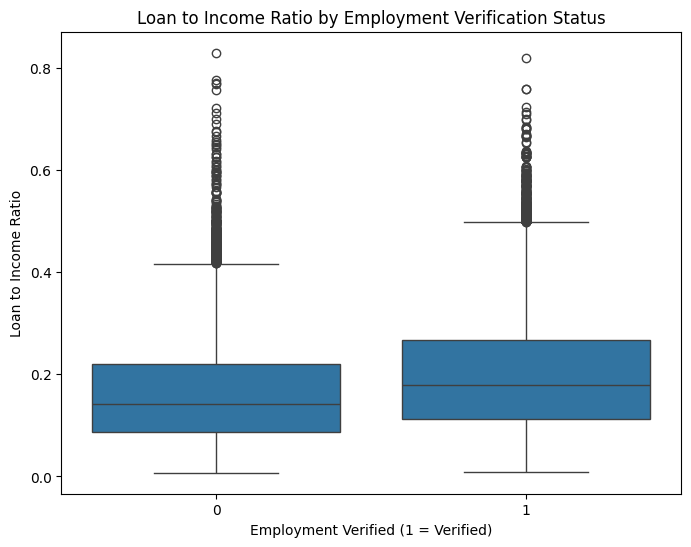

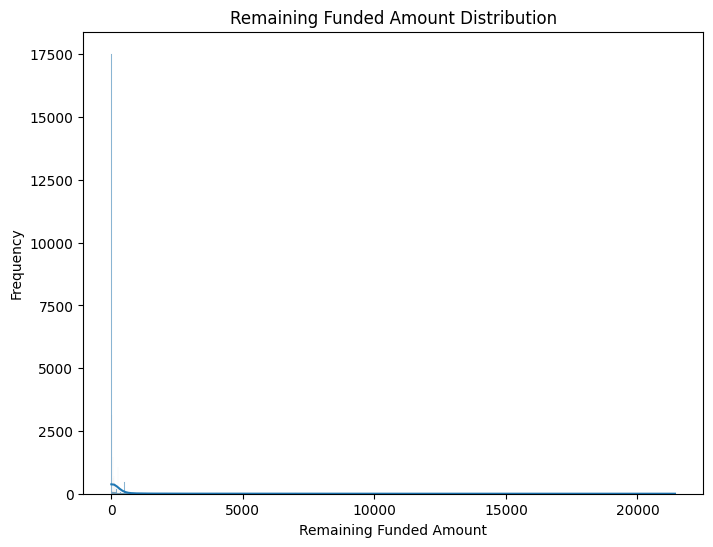

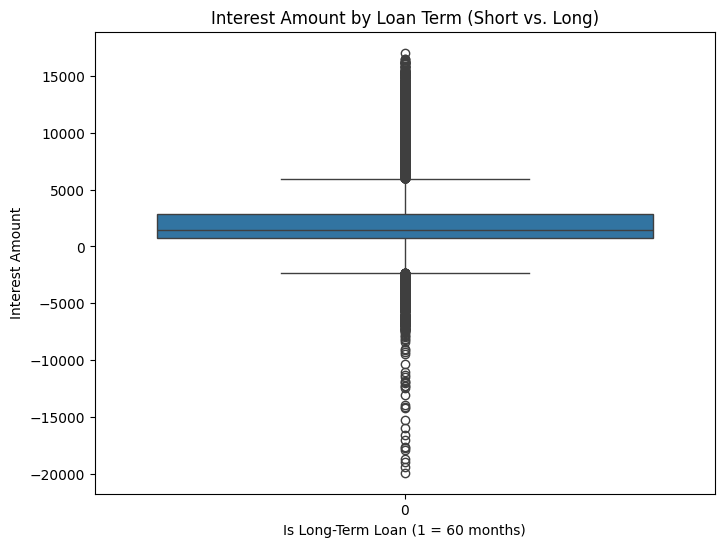

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(loan_data['loan_to_income_ratio'], kde=True)
plt.title('Distribution of Loan to Income Ratio')
plt.xlabel('Loan to Income Ratio')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
sns.barplot(data=loan_data, x='term', y='interest_amount')
plt.title('Total Interest Amount by Loan Term')
plt.xlabel('Term')
plt.ylabel('Interest Amount')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_data['income_per_month'])
plt.title('Monthly Income Distribution')
plt.xlabel('Income per Month')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='loan_amnt', y='total_paid', hue='risk_grade', palette='viridis', s=100)
plt.title('Loan Amount vs. Total Paid by Risk Grade')
plt.xlabel('Loan Amount')
plt.ylabel('Total Paid')
plt.legend(title='Risk Grade')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_data, x='employment_verified', y='loan_to_income_ratio')
plt.title('Loan to Income Ratio by Employment Verification Status')
plt.xlabel('Employment Verified (1 = Verified)')
plt.ylabel('Loan to Income Ratio')
plt.show()
plt.figure(figsize=(8, 6))
sns.histplot(loan_data['remaining_funded'], kde=True)
plt.title('Remaining Funded Amount Distribution')
plt.xlabel('Remaining Funded Amount')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_data, x='is_long_term', y='interest_amount')
plt.title('Interest Amount by Loan Term (Short vs. Long)')
plt.xlabel('Is Long-Term Loan (1 = 60 months)')
plt.ylabel('Interest Amount')
plt.show()


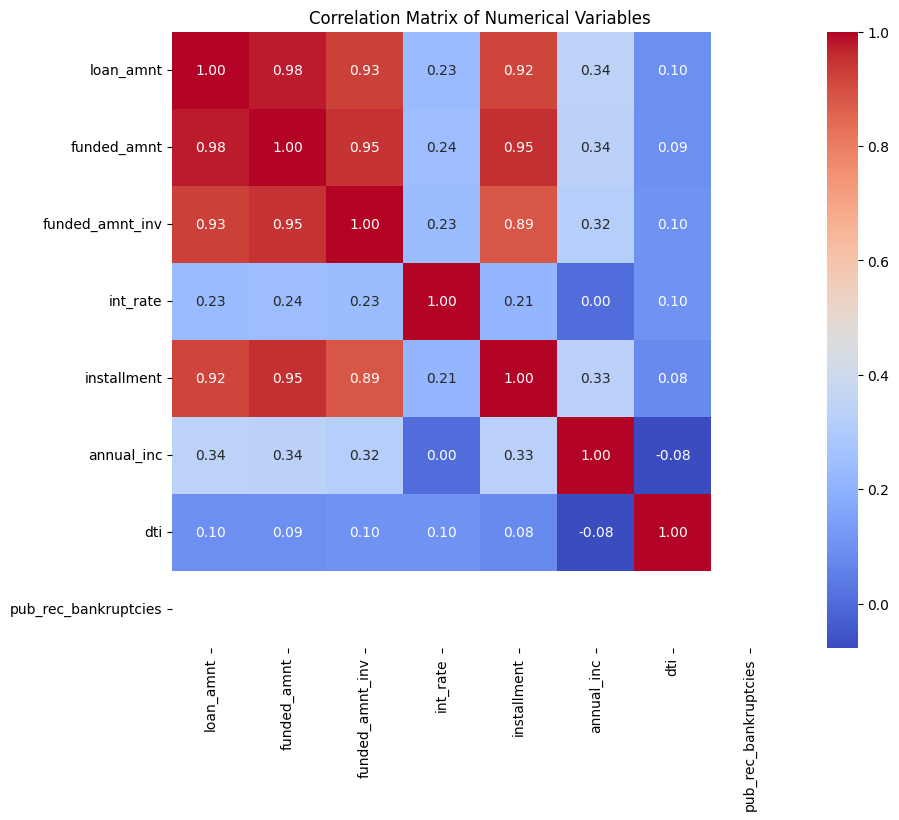

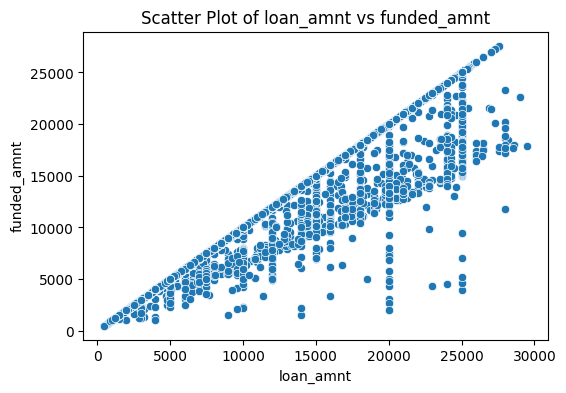

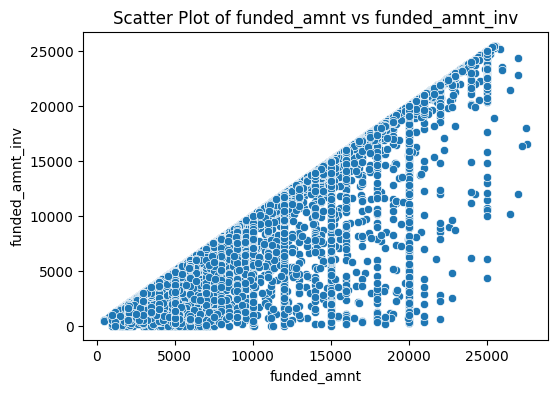

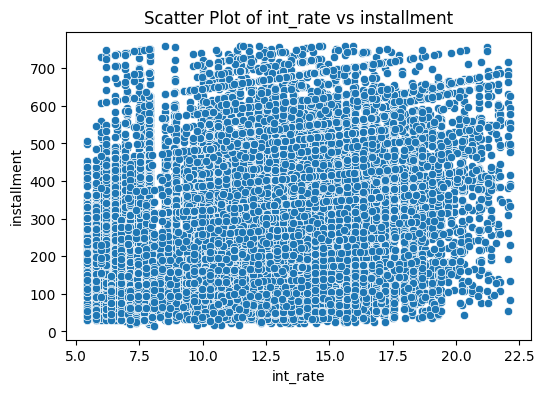

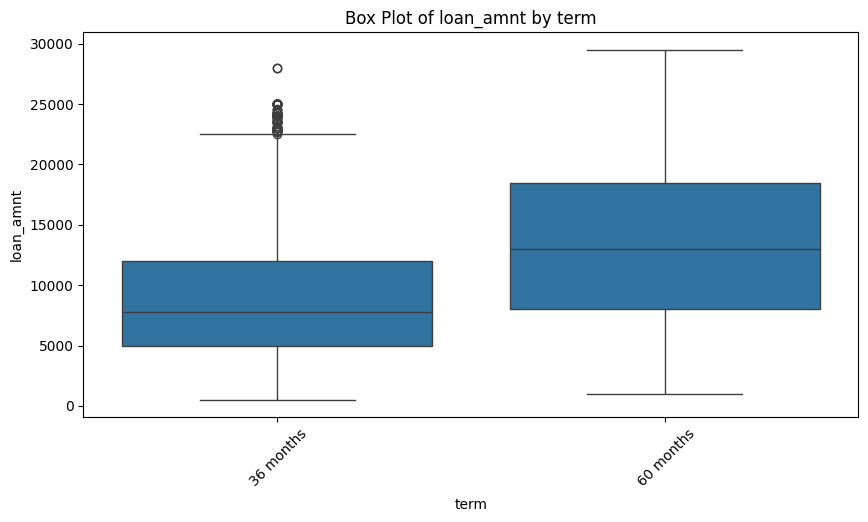

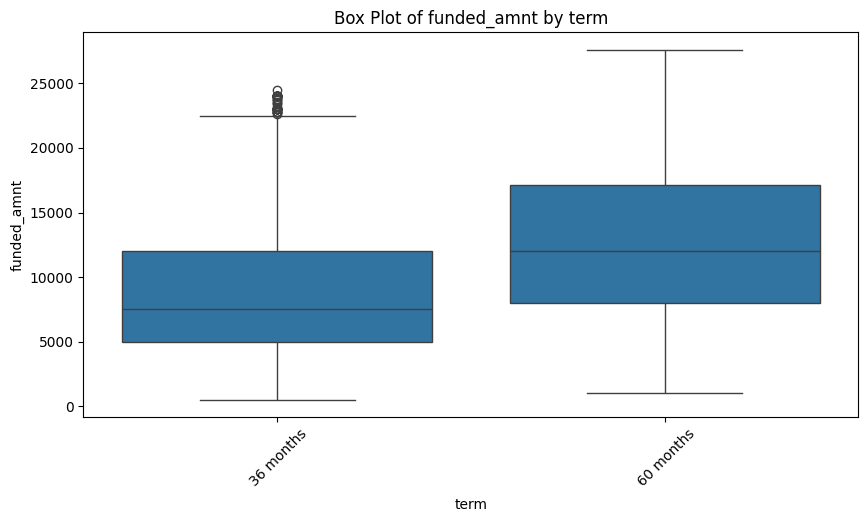

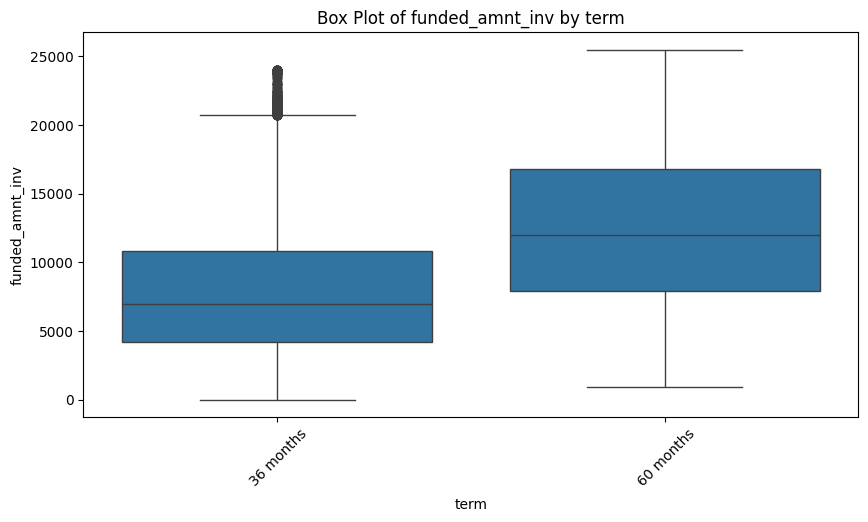

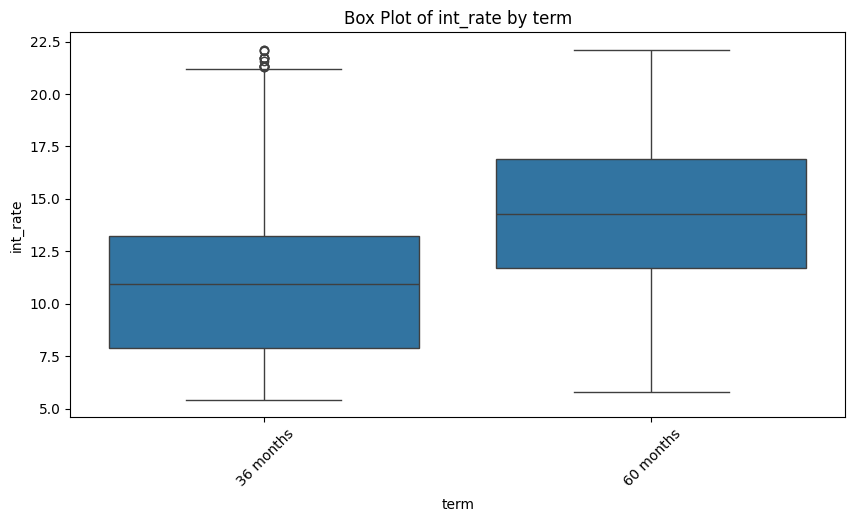

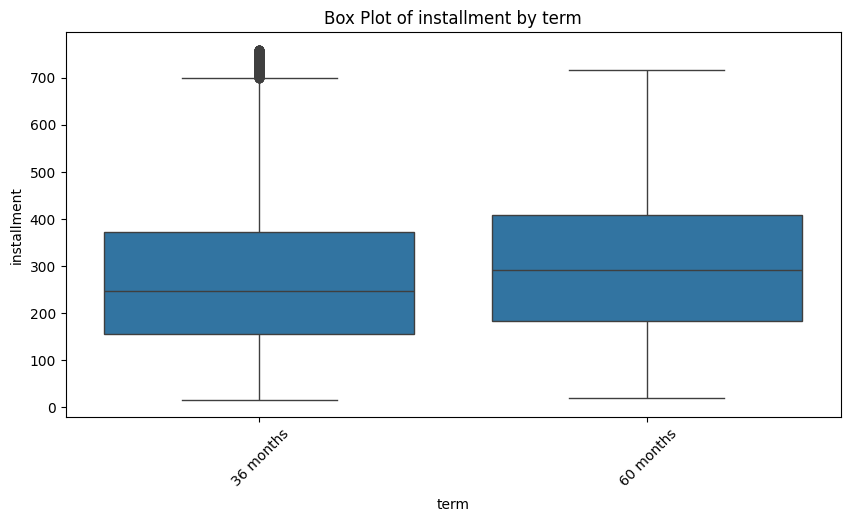

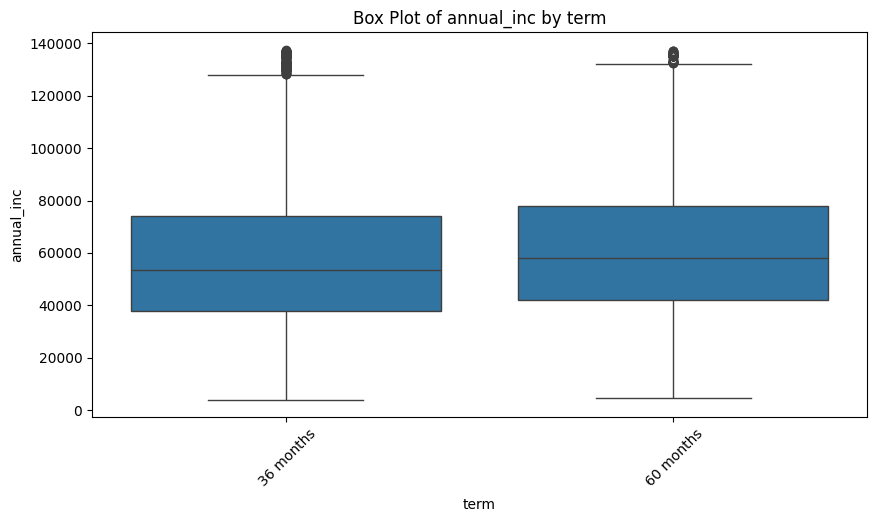

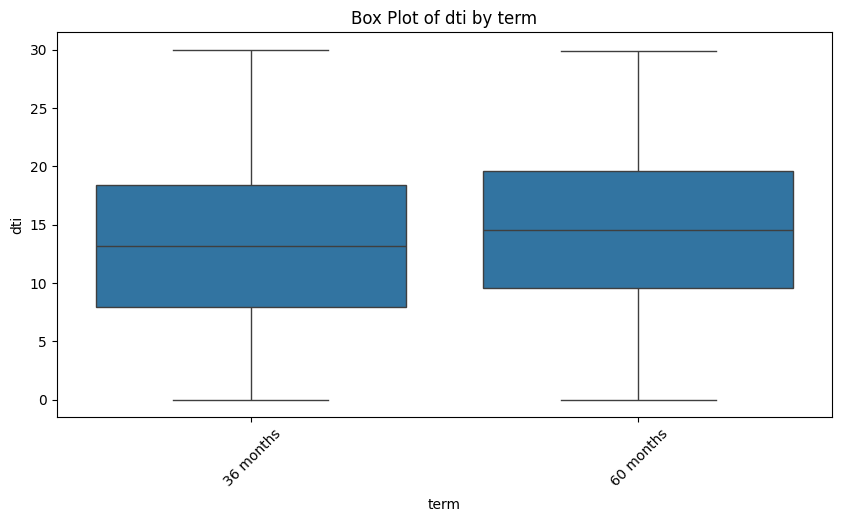

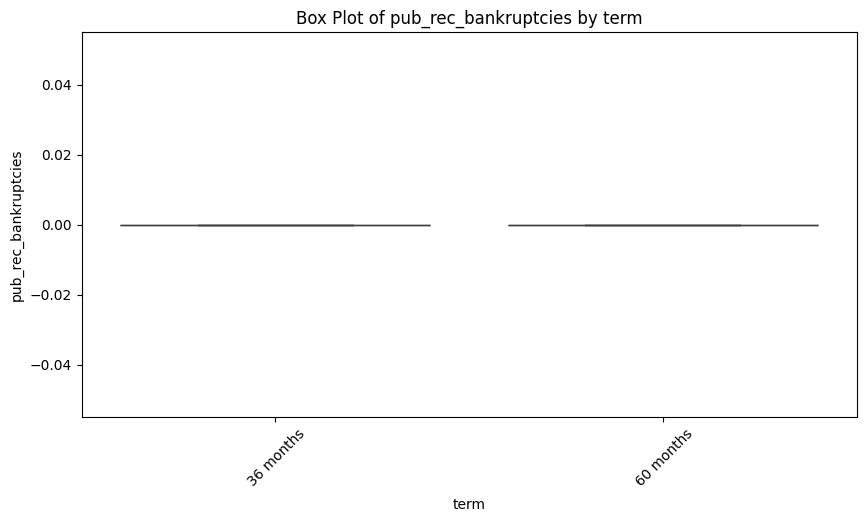

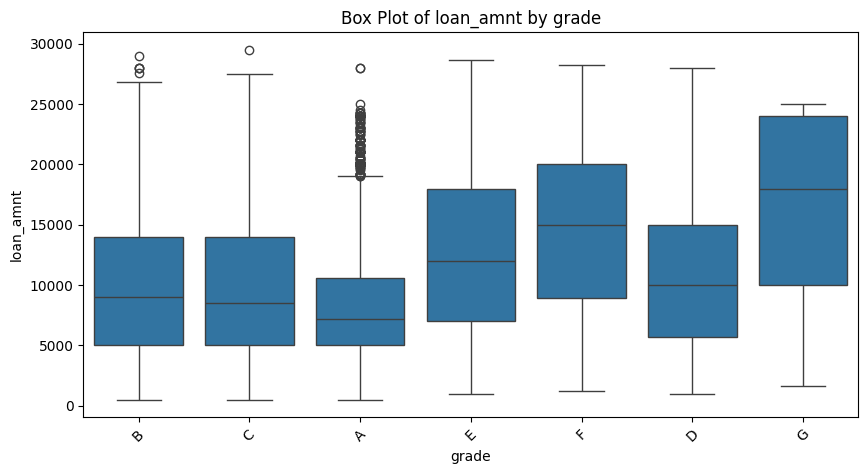

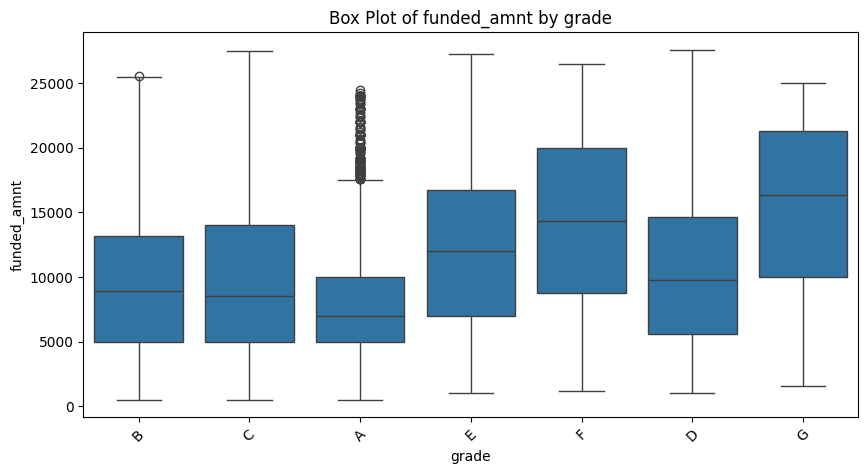

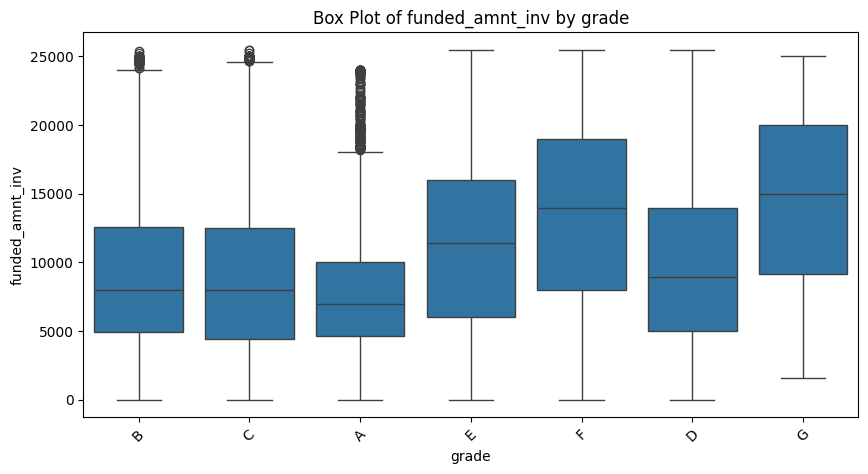

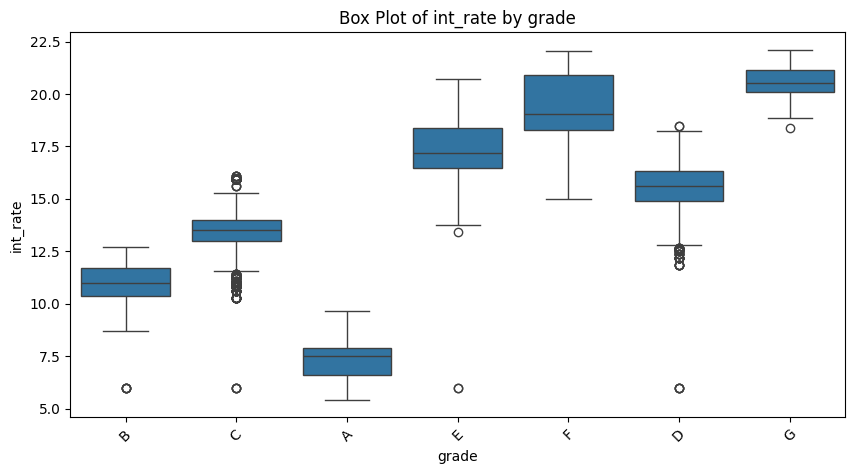

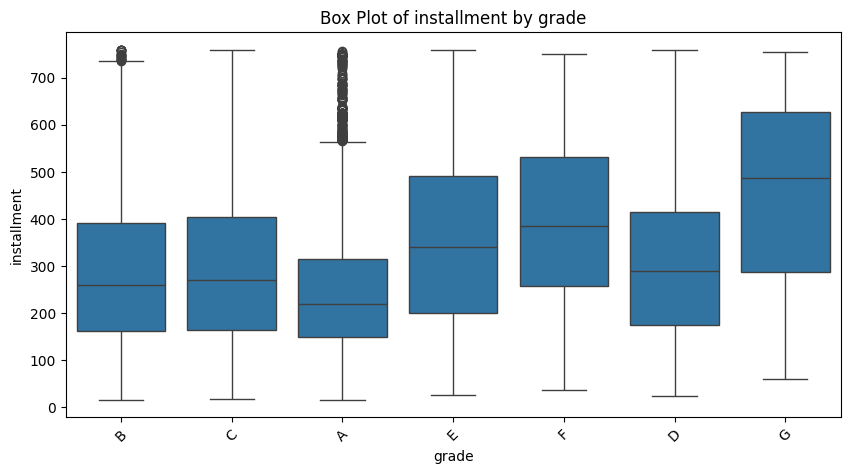

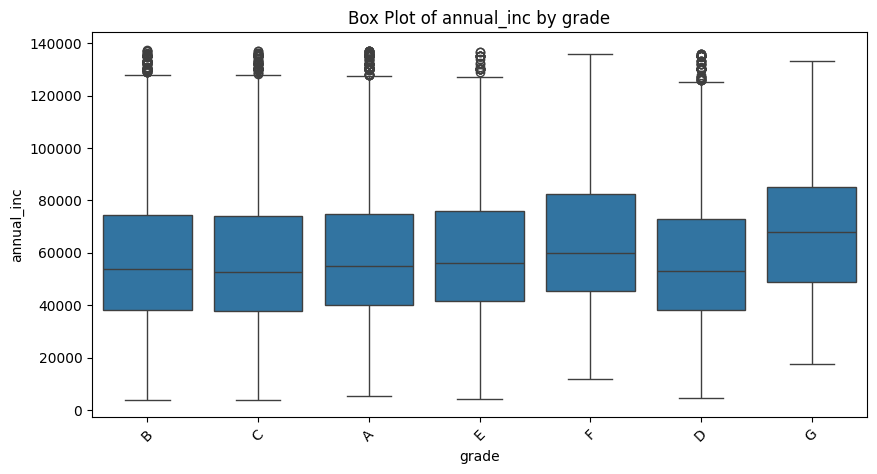

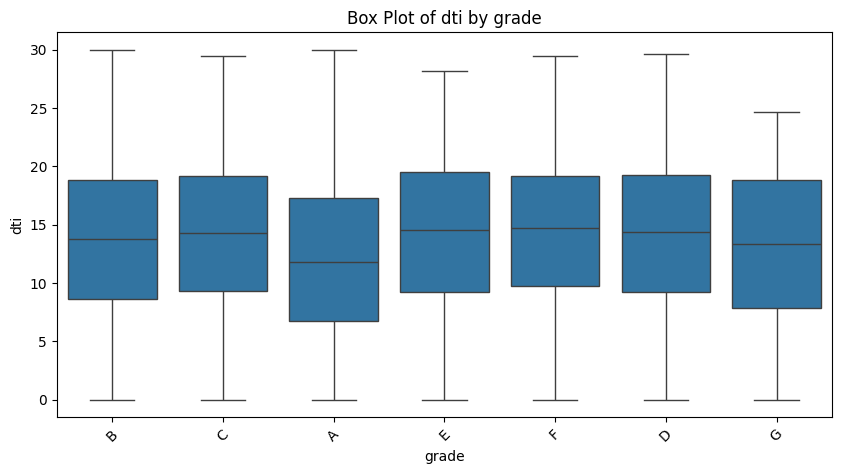

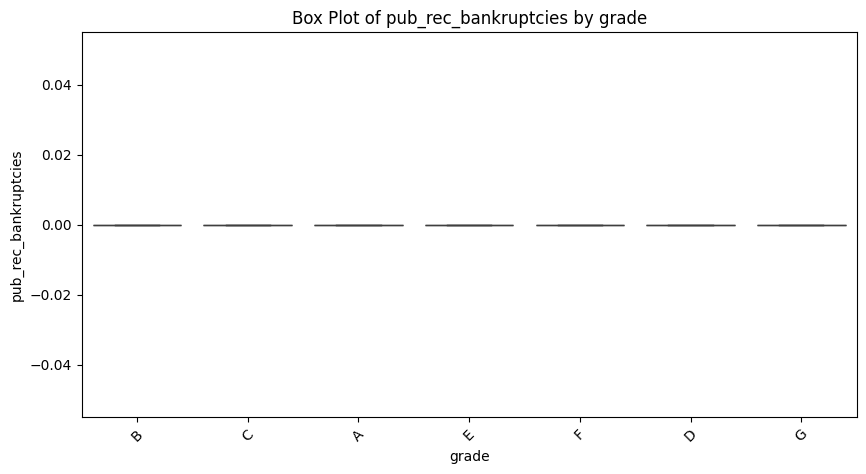

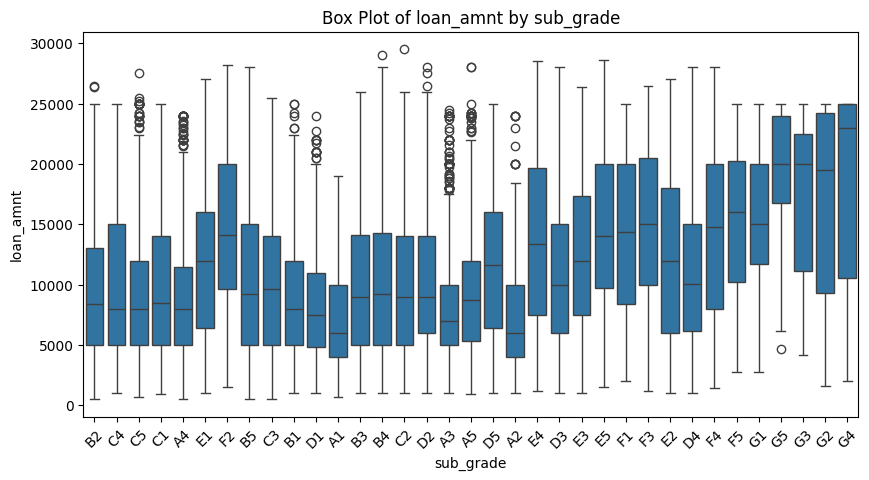

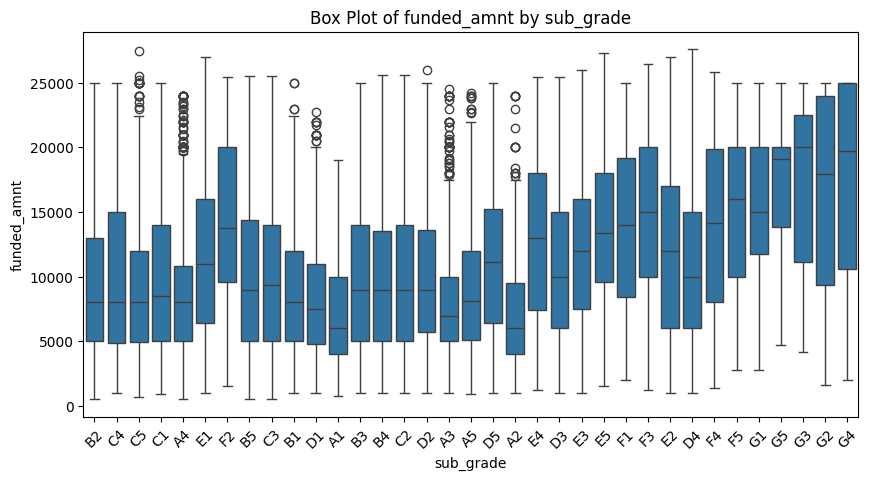

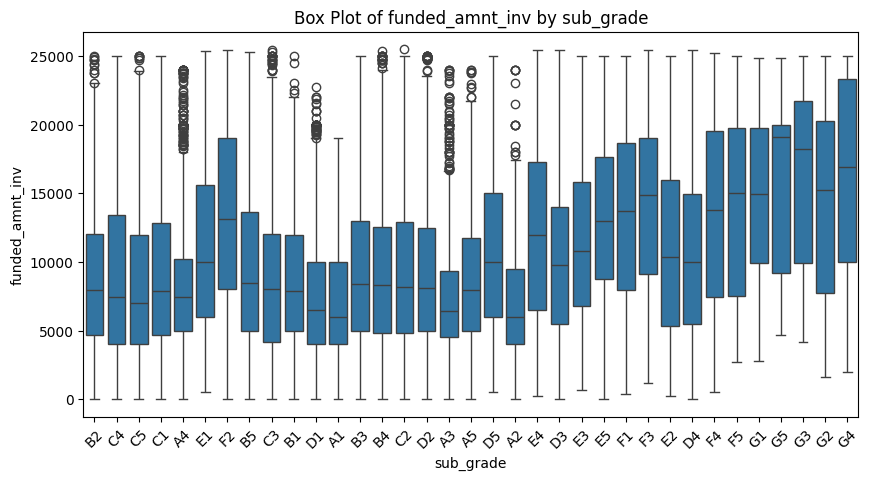

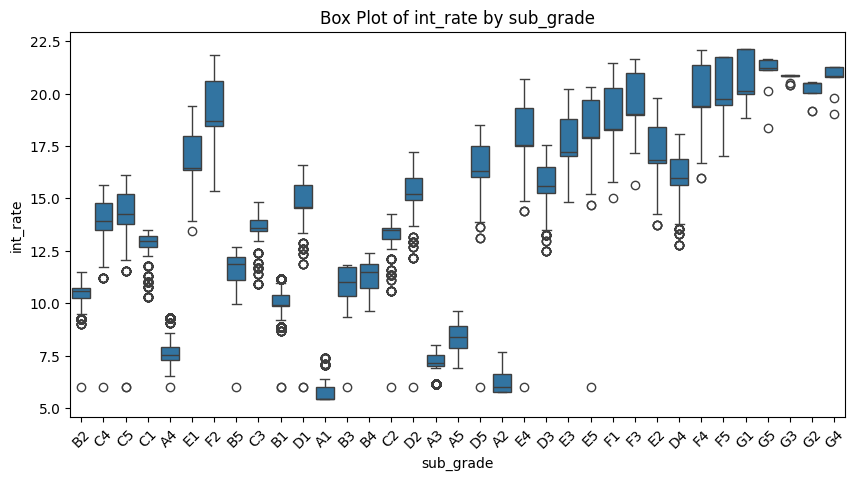

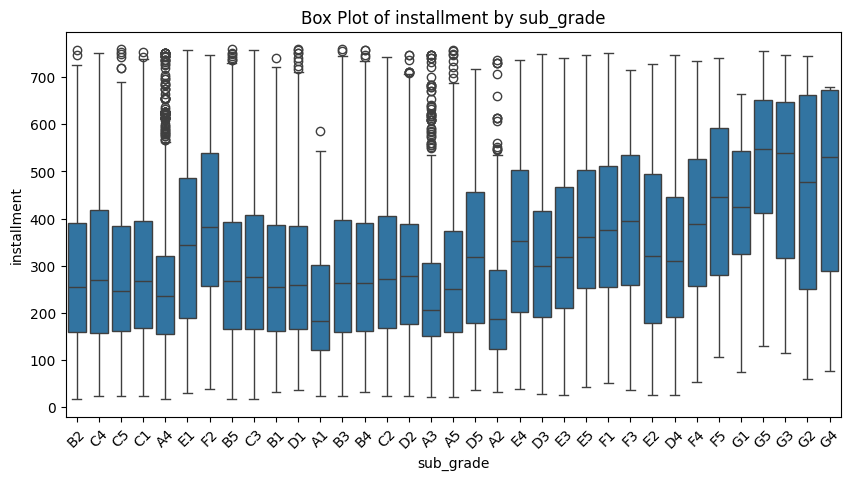

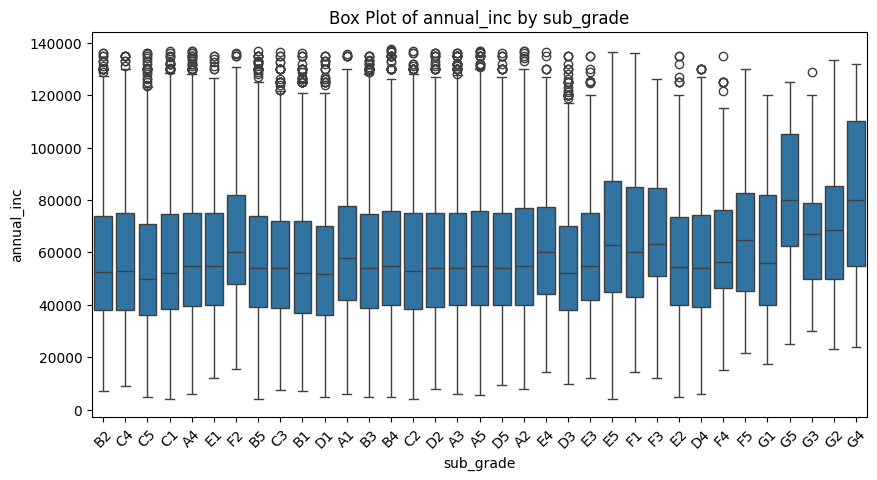

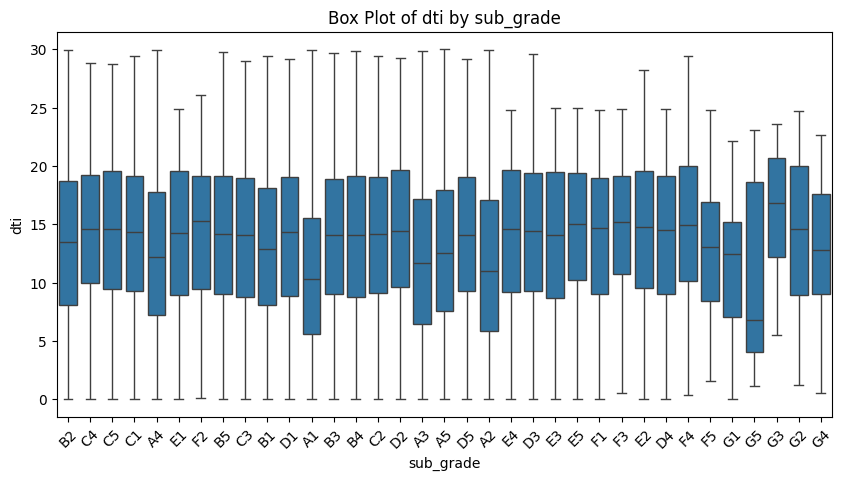

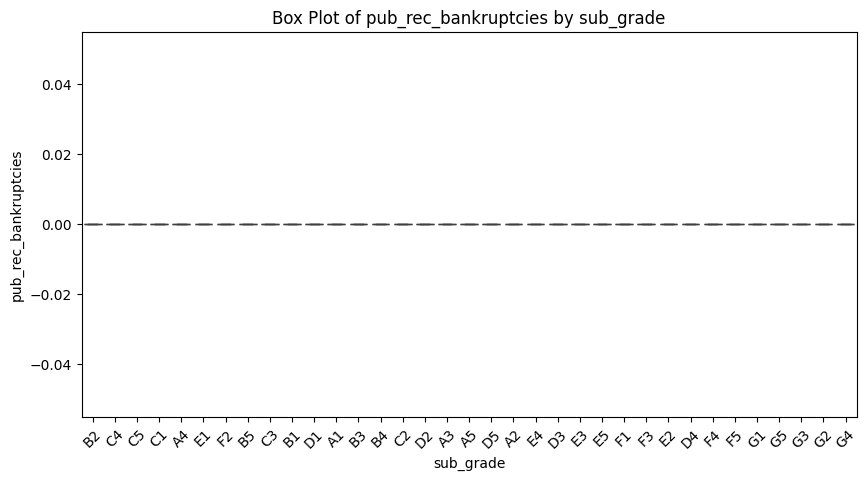

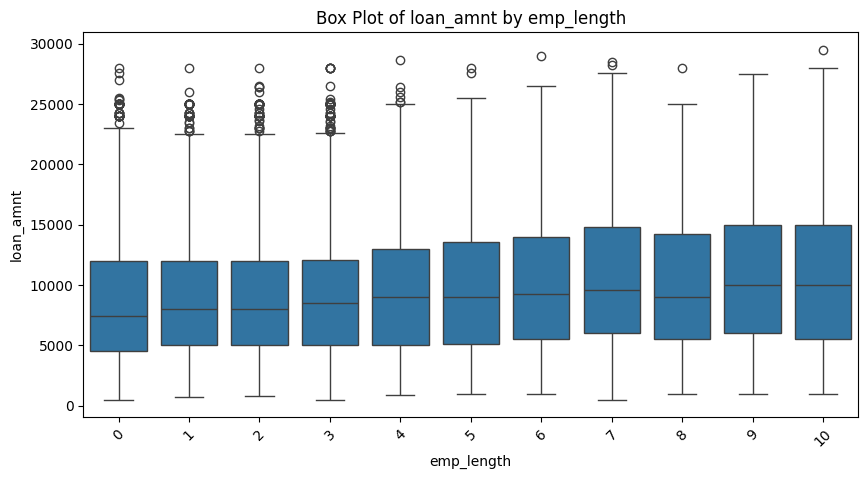

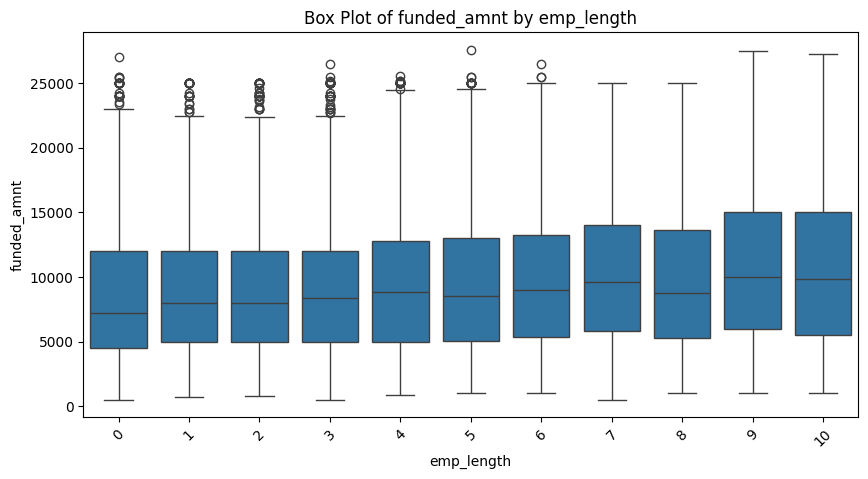

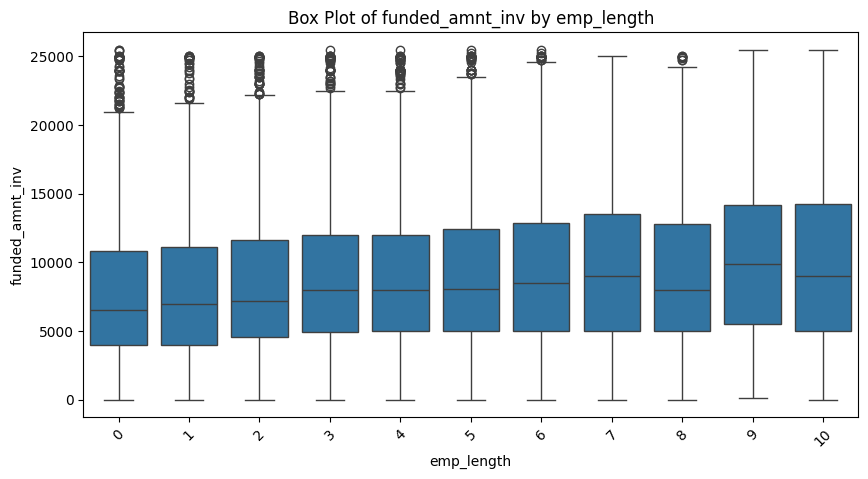

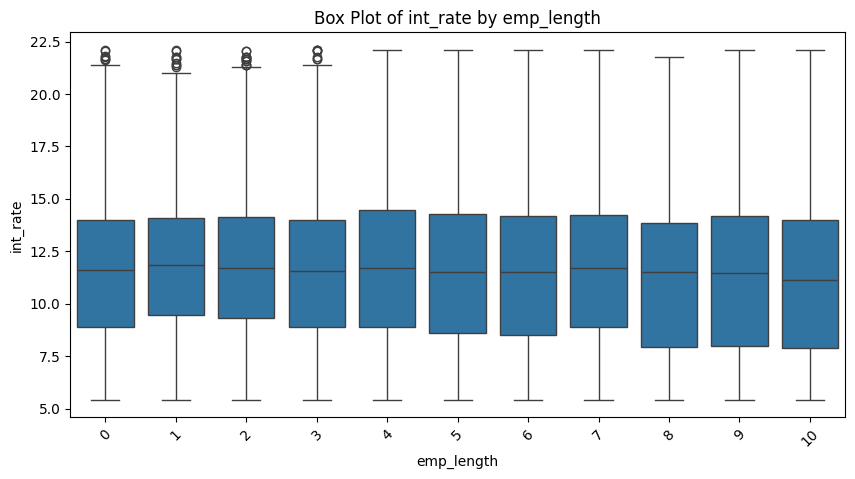

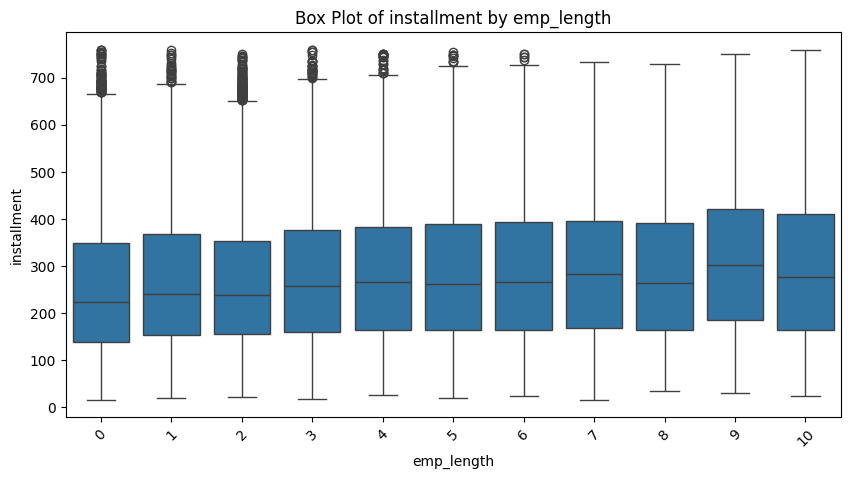

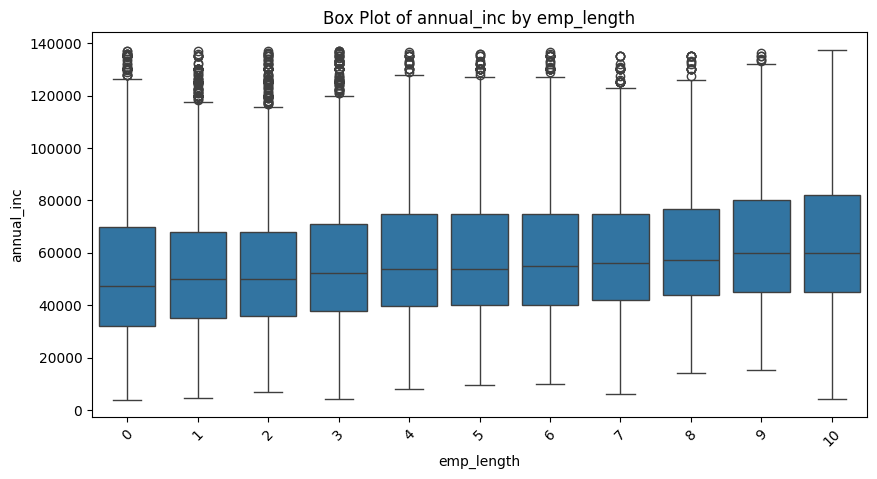

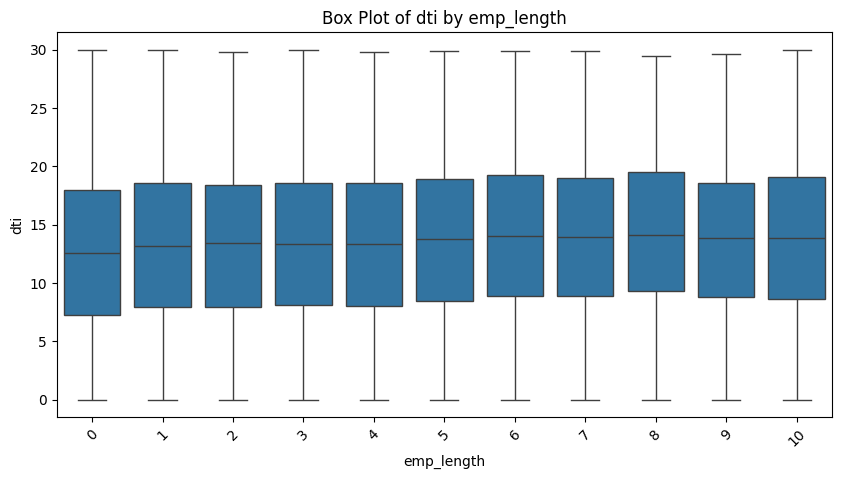

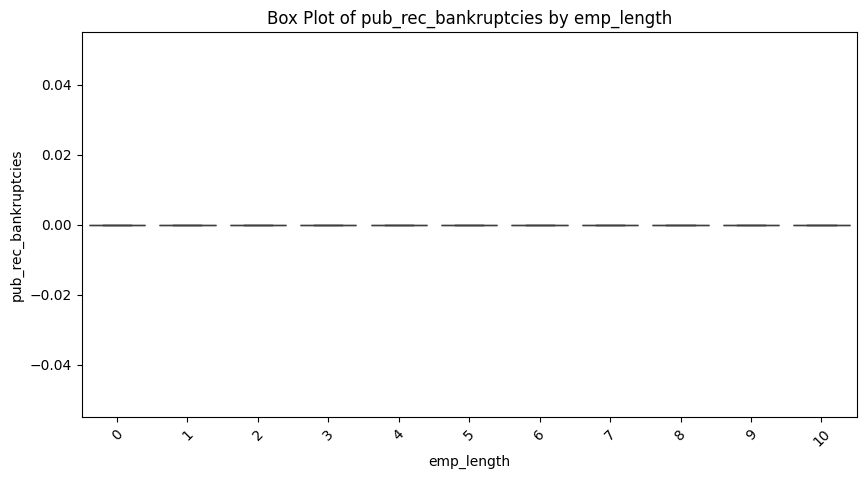

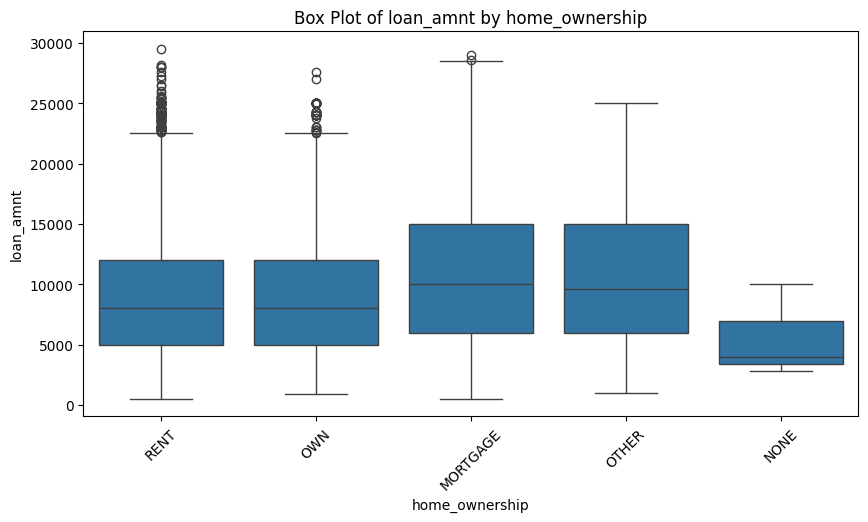

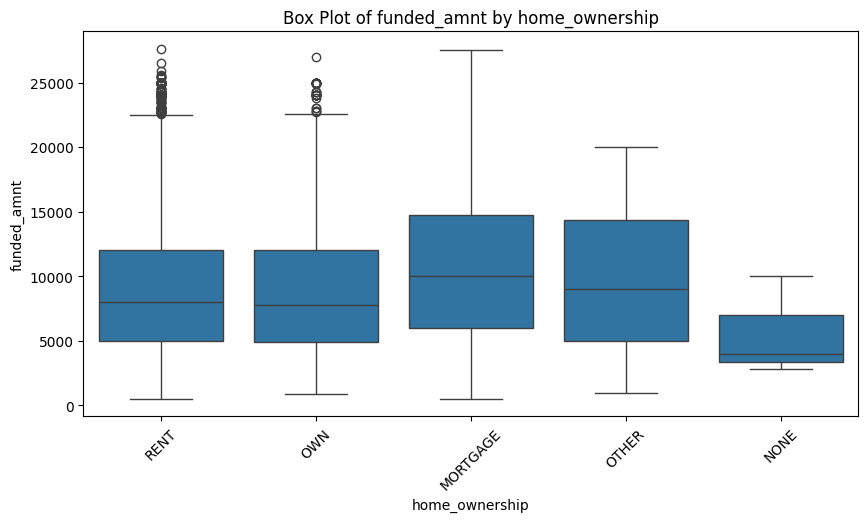

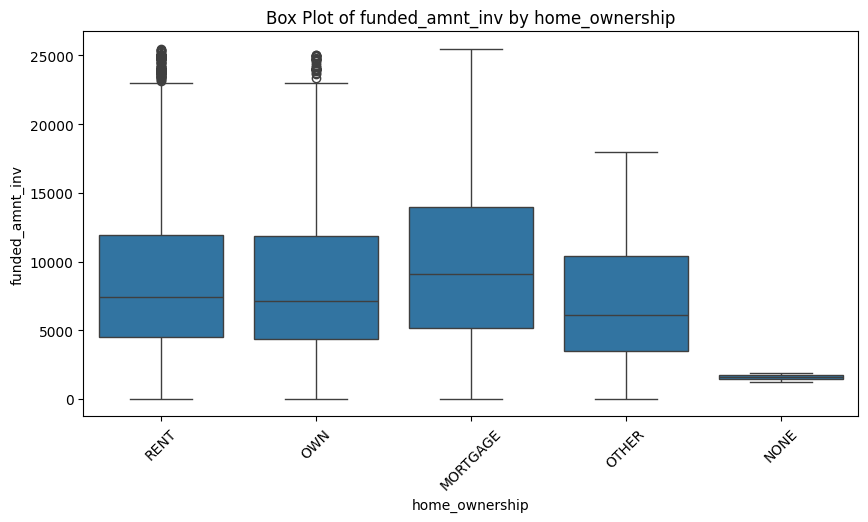

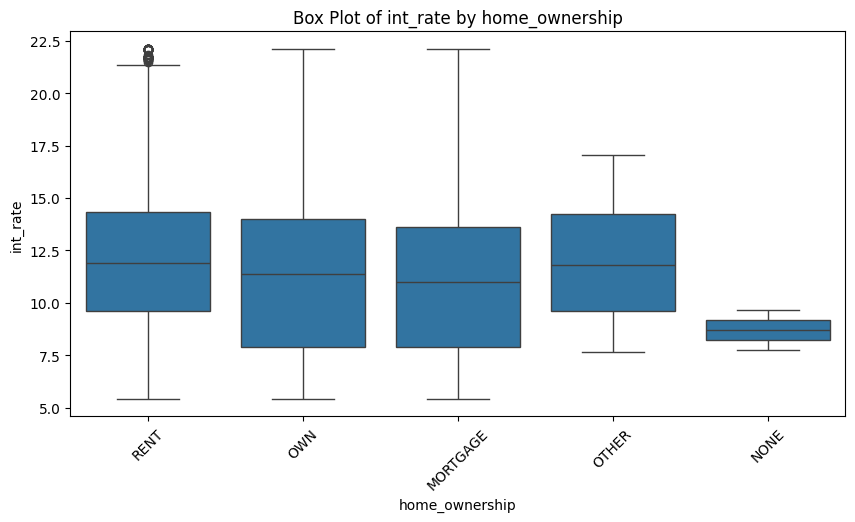

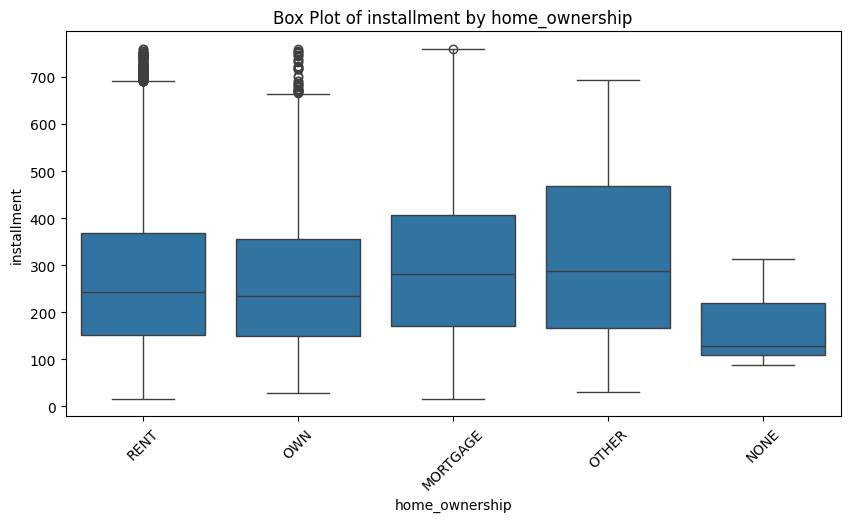

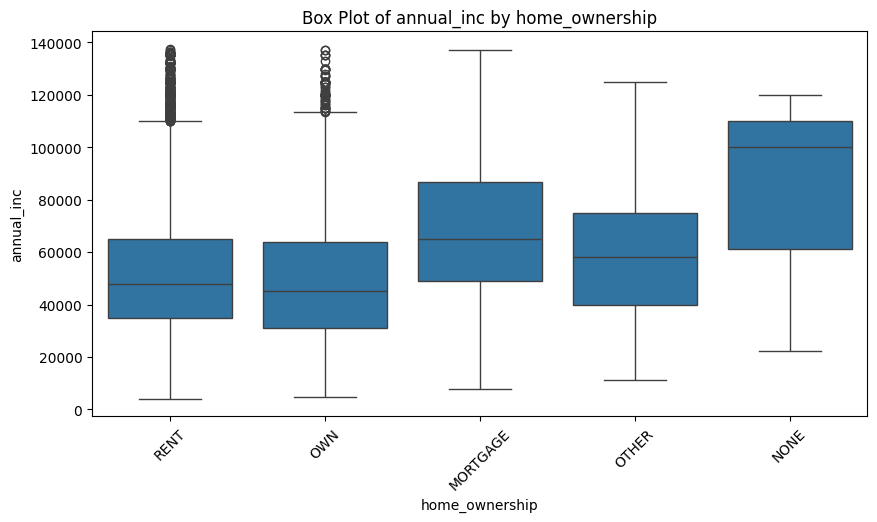

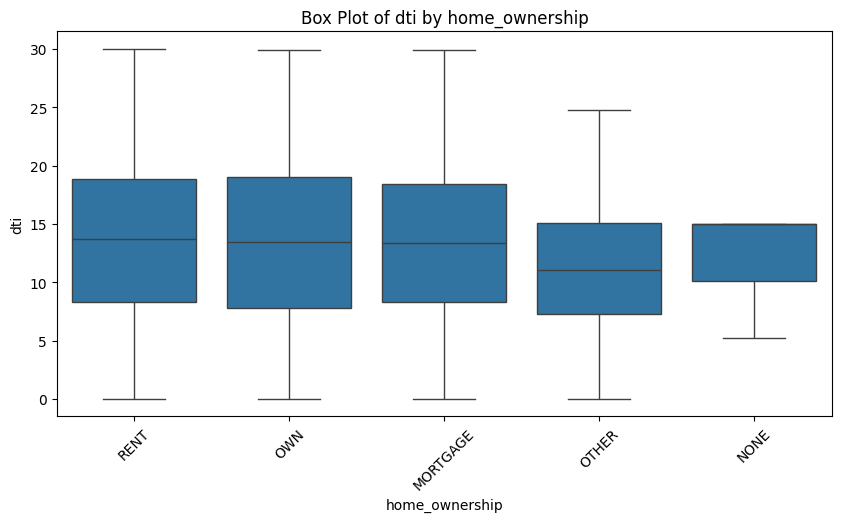

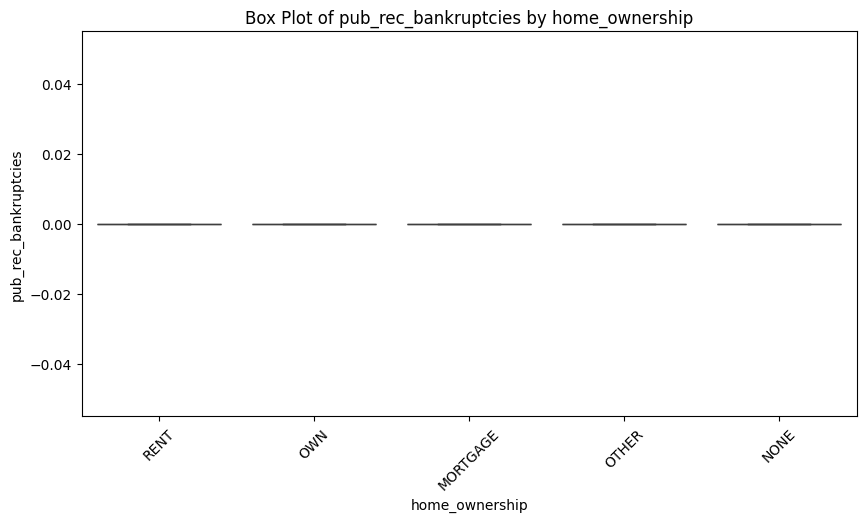

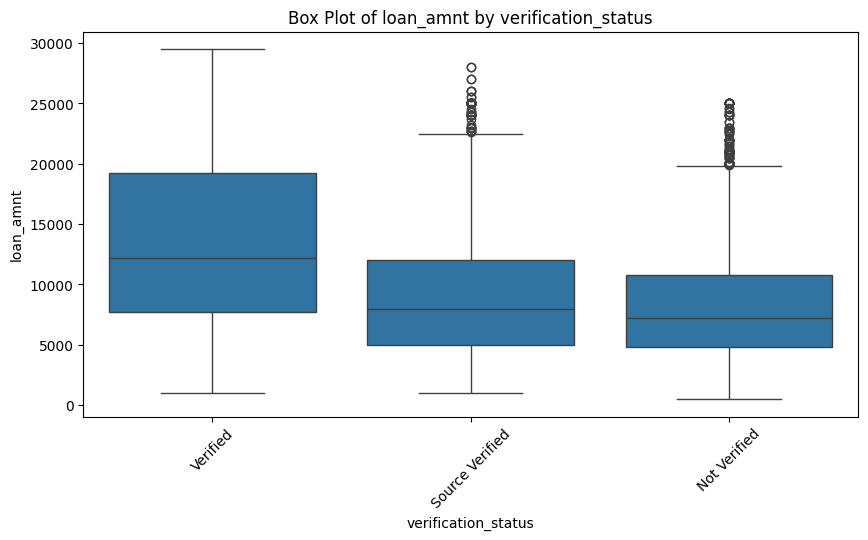

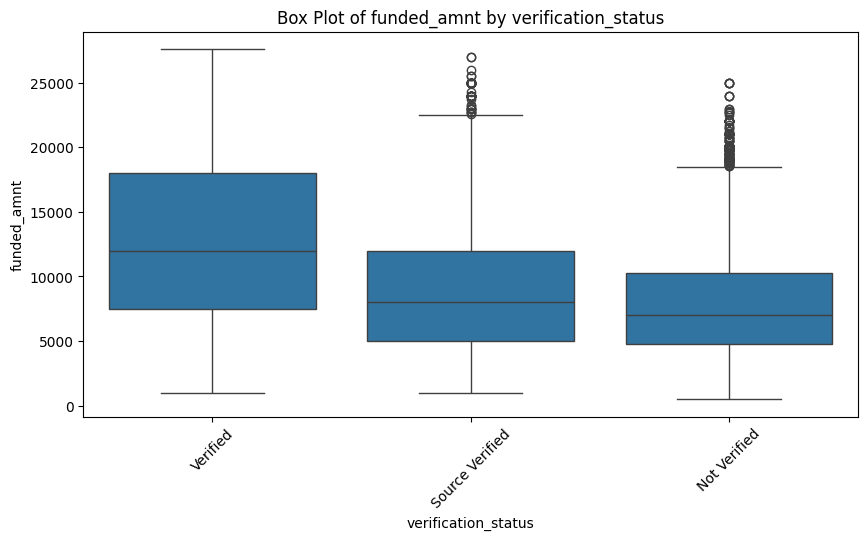

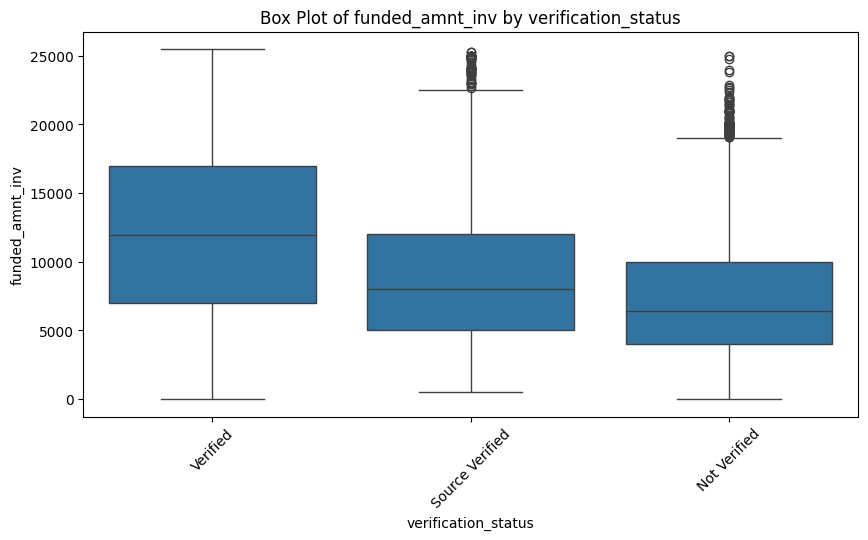

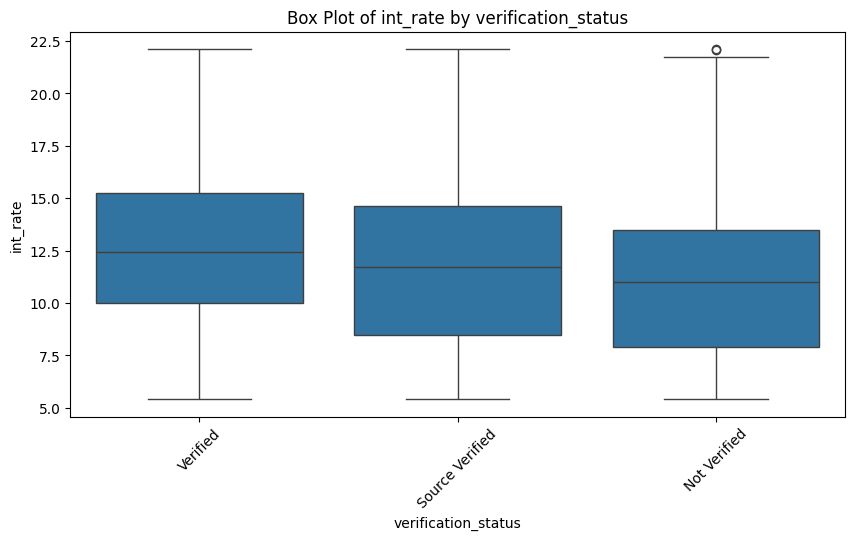

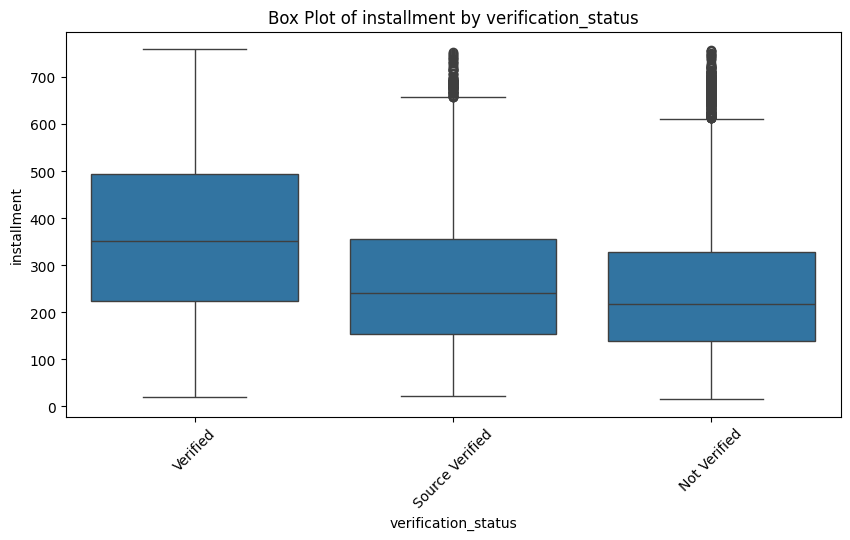

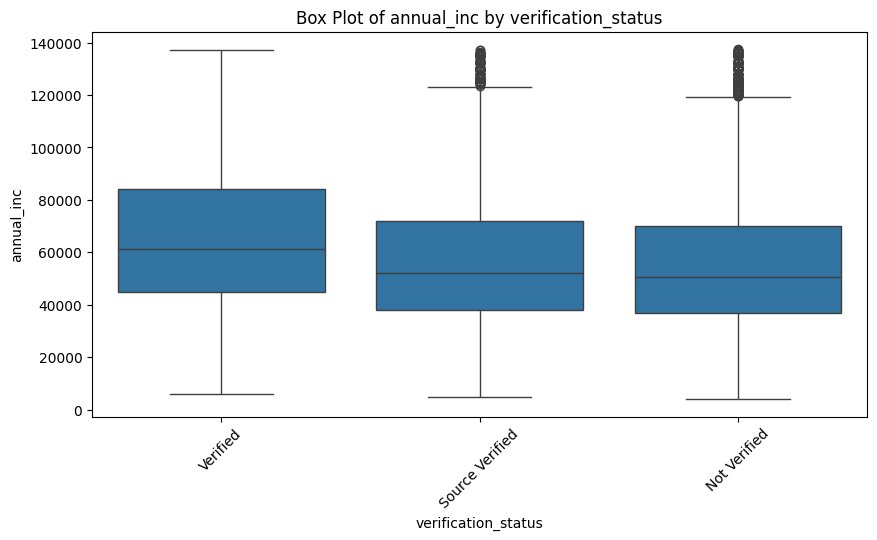

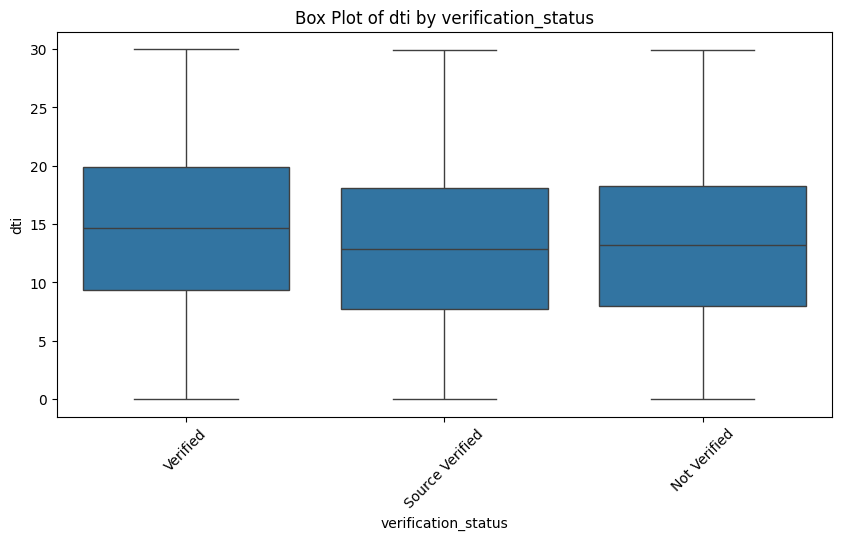

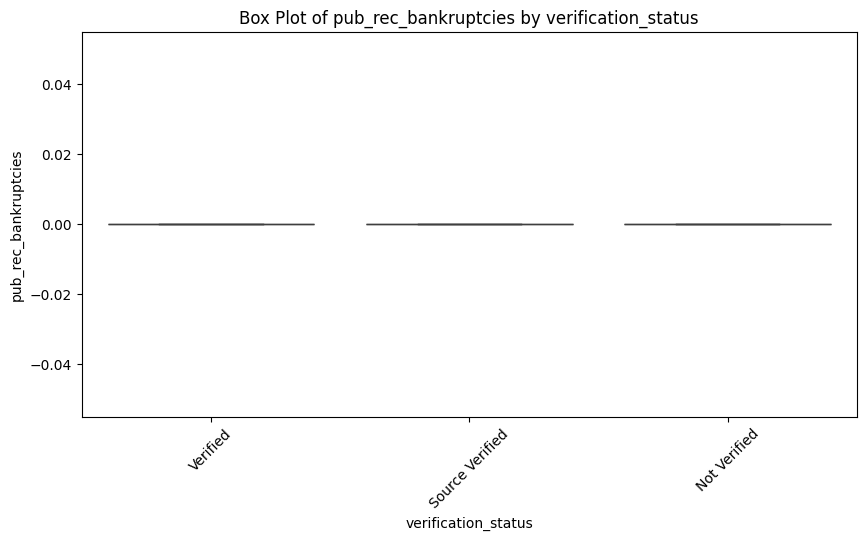

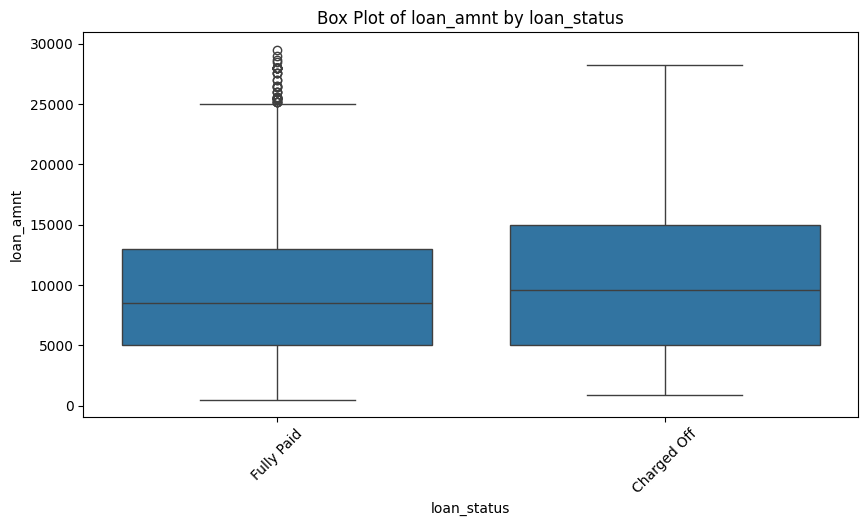

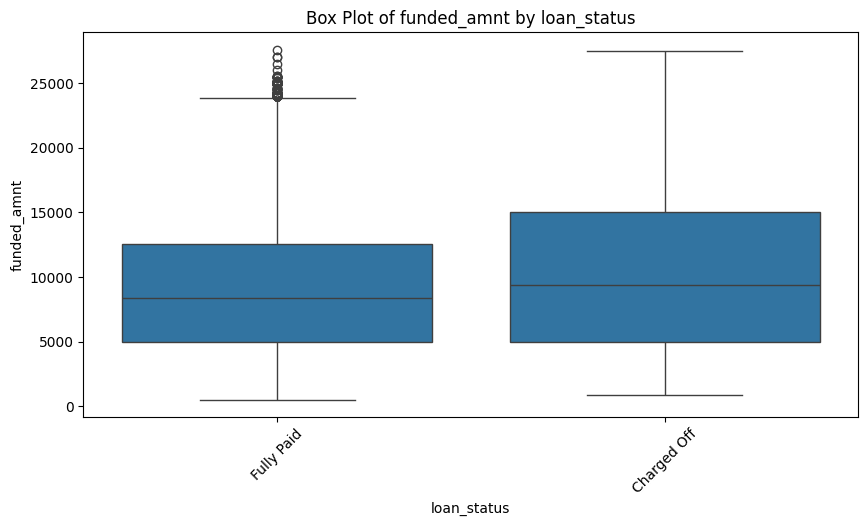

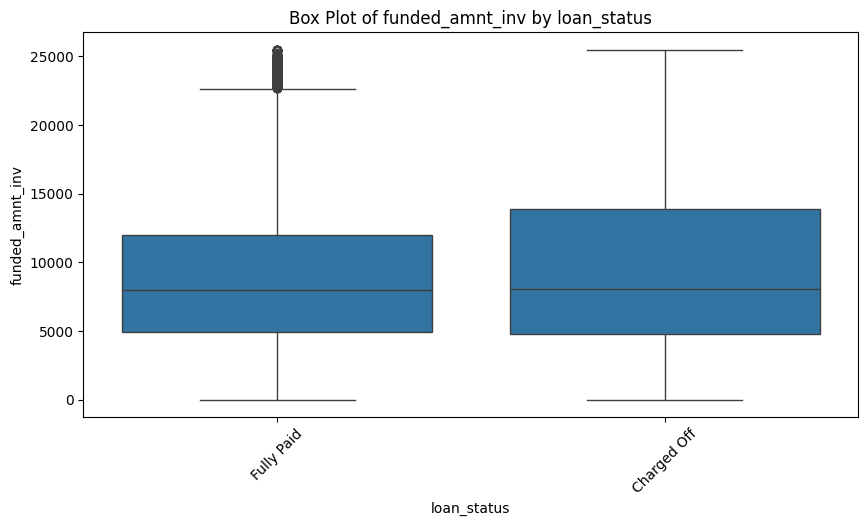

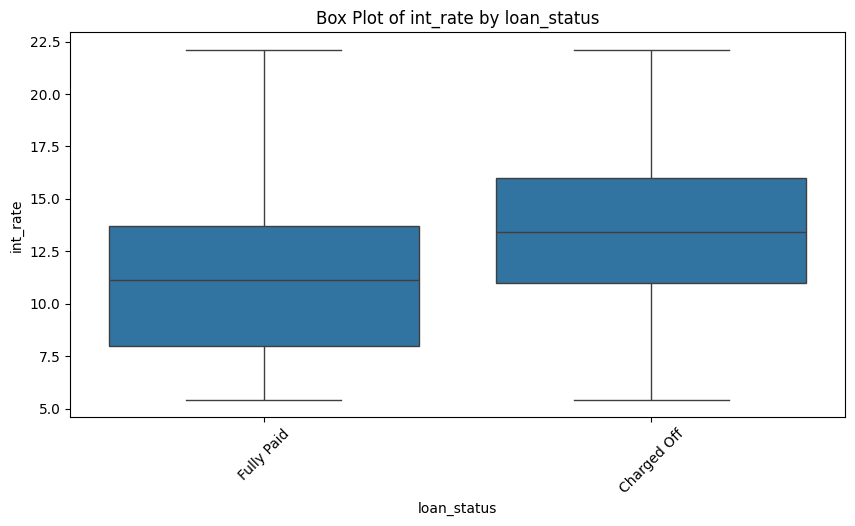

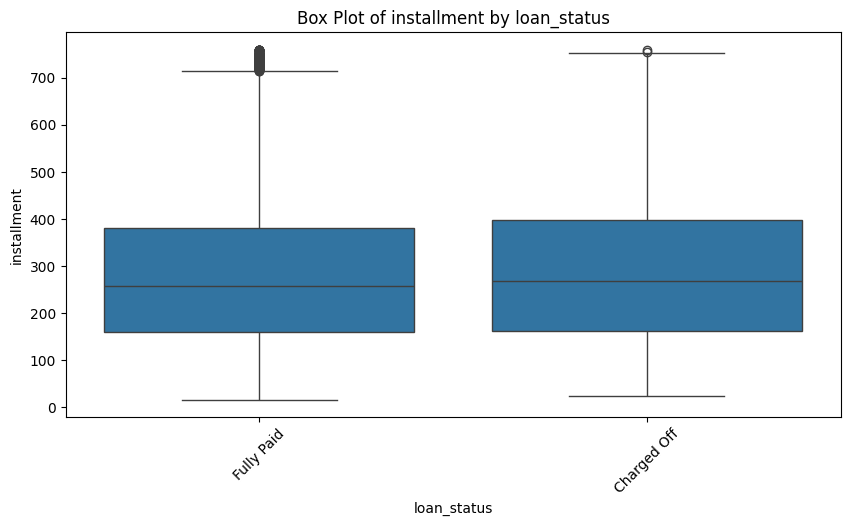

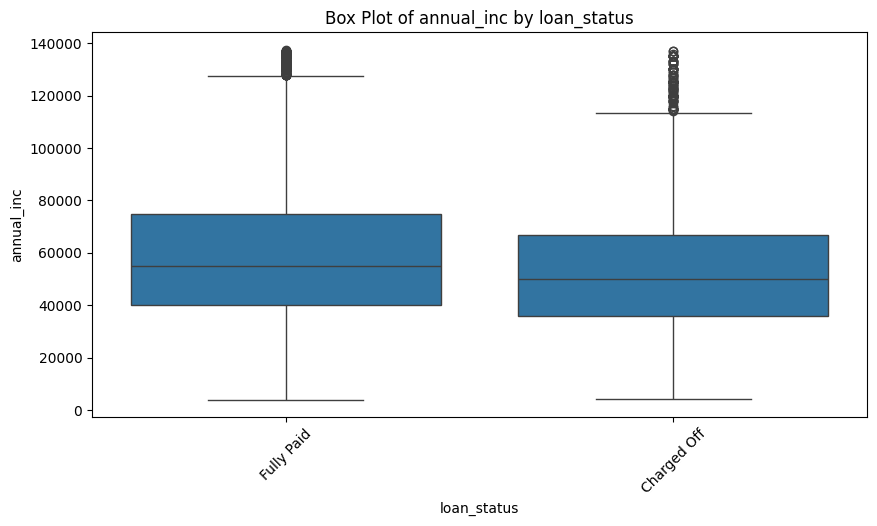

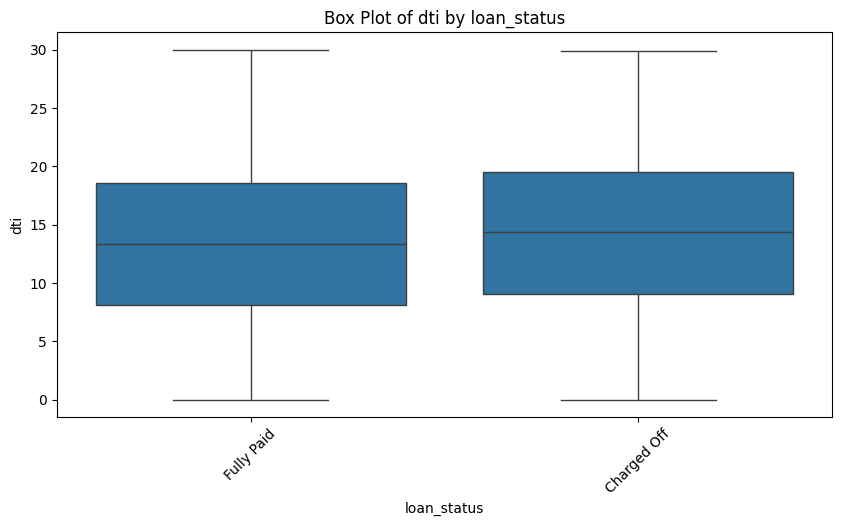

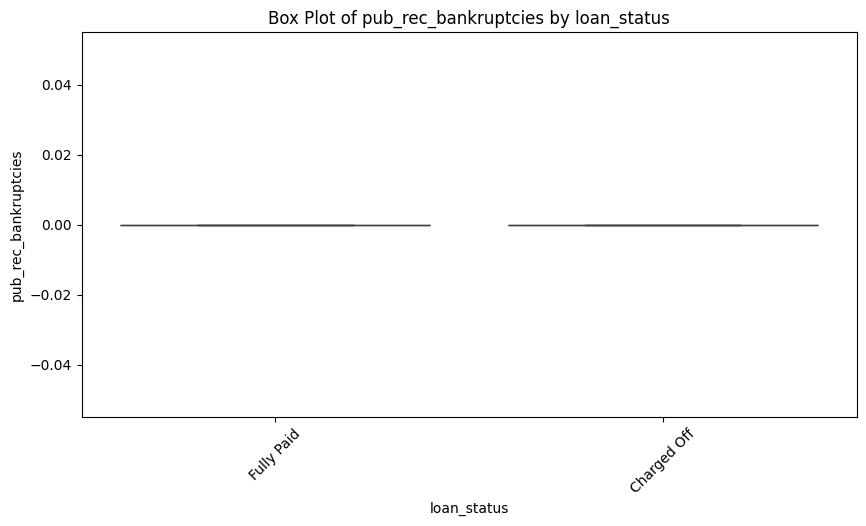

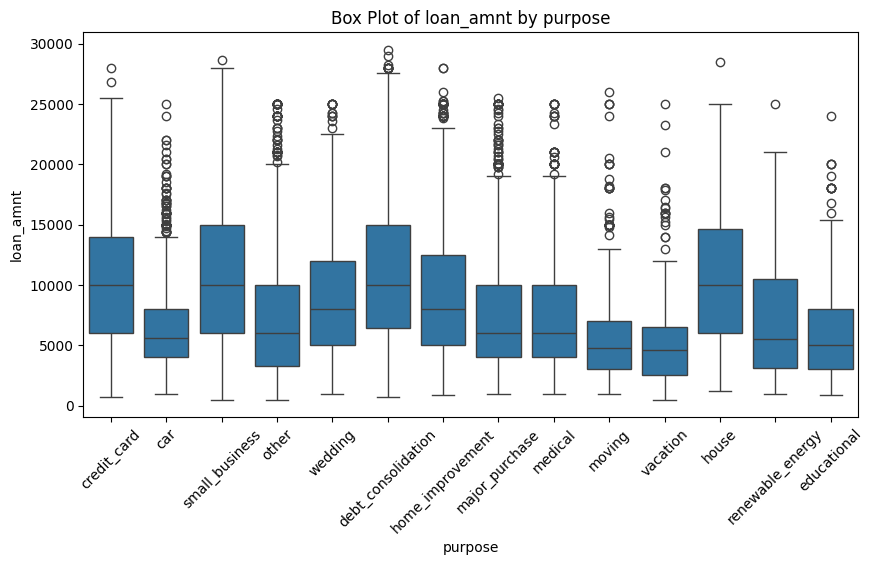

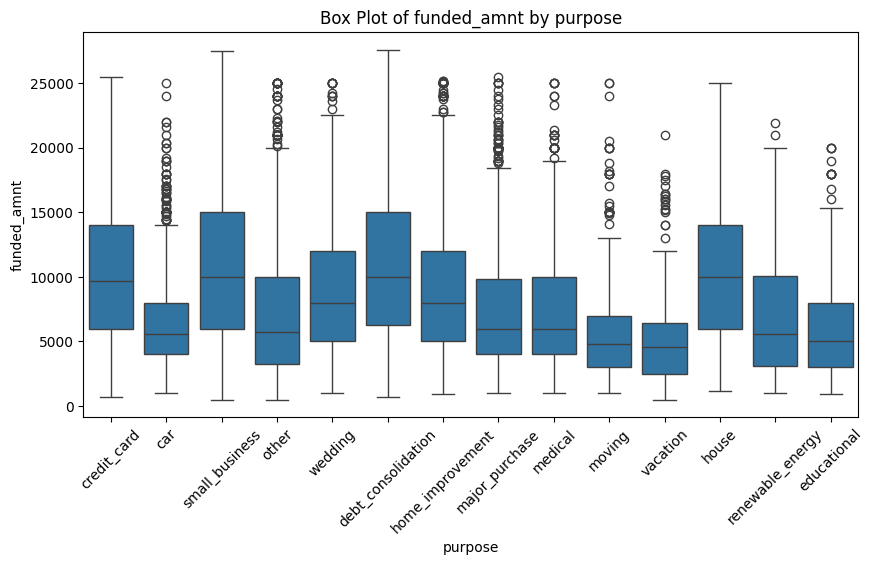

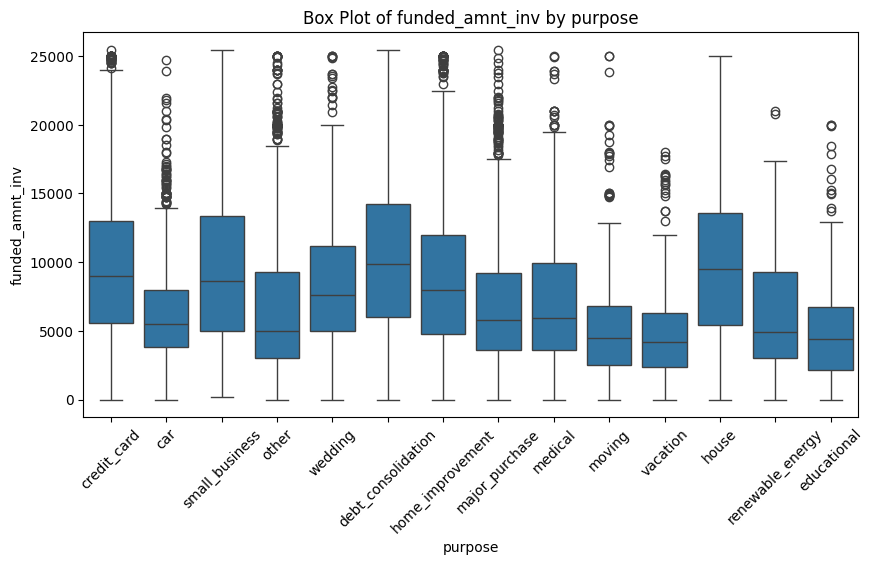

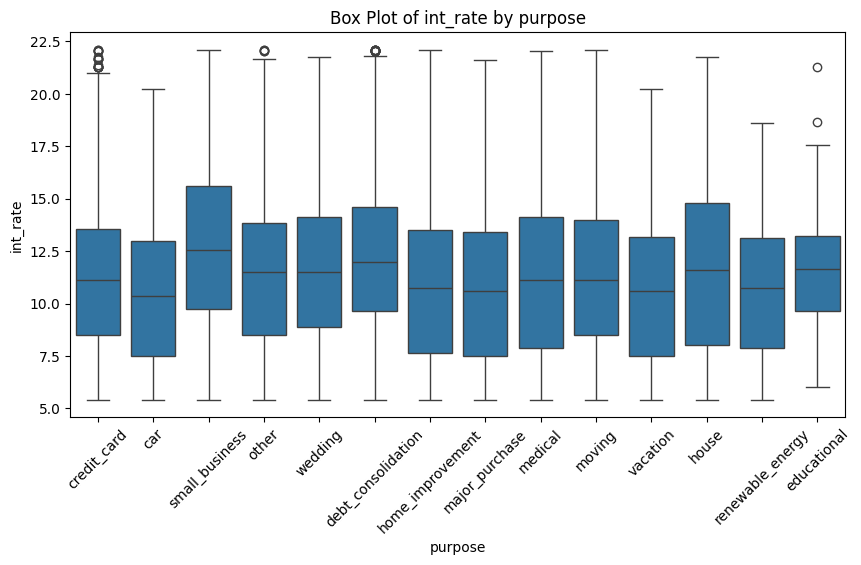

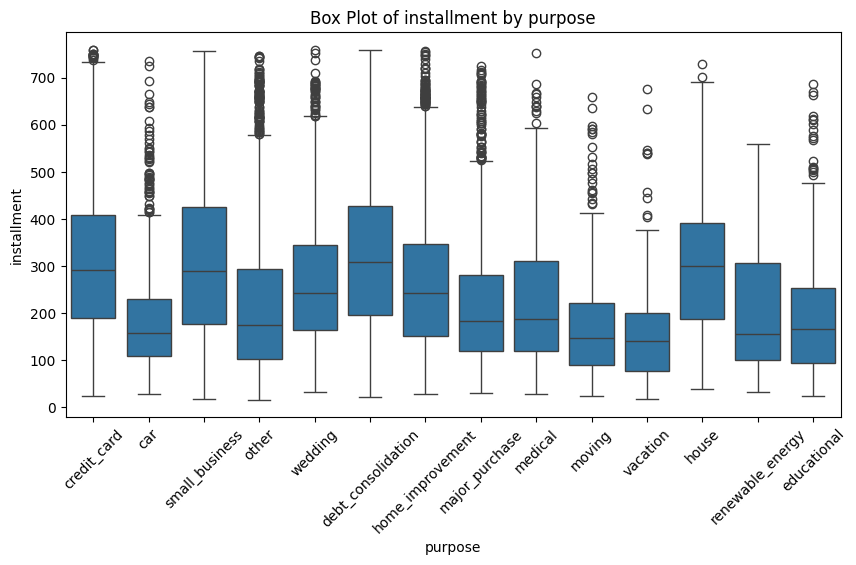

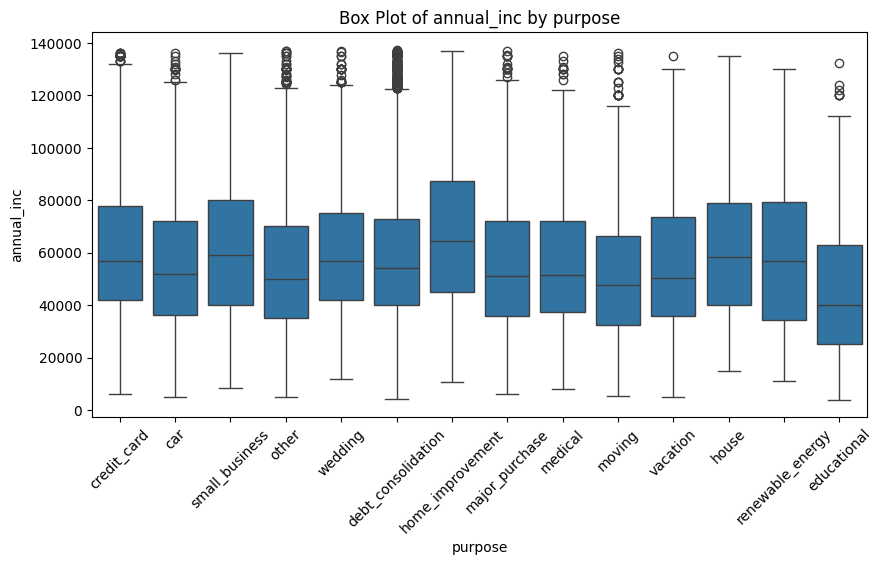

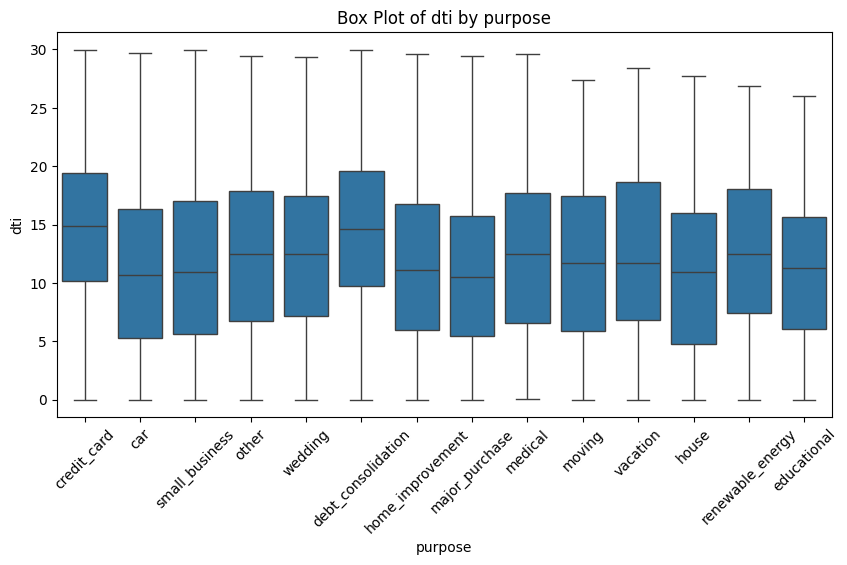

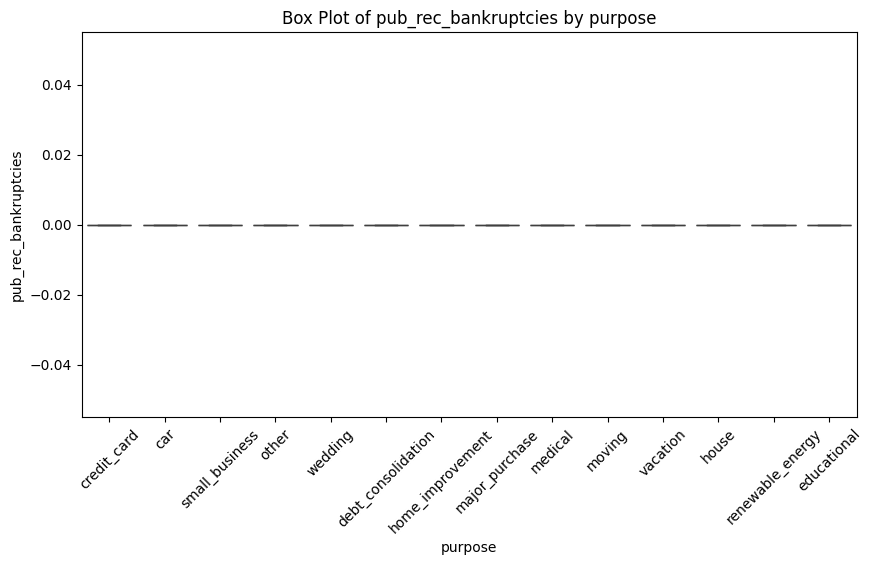

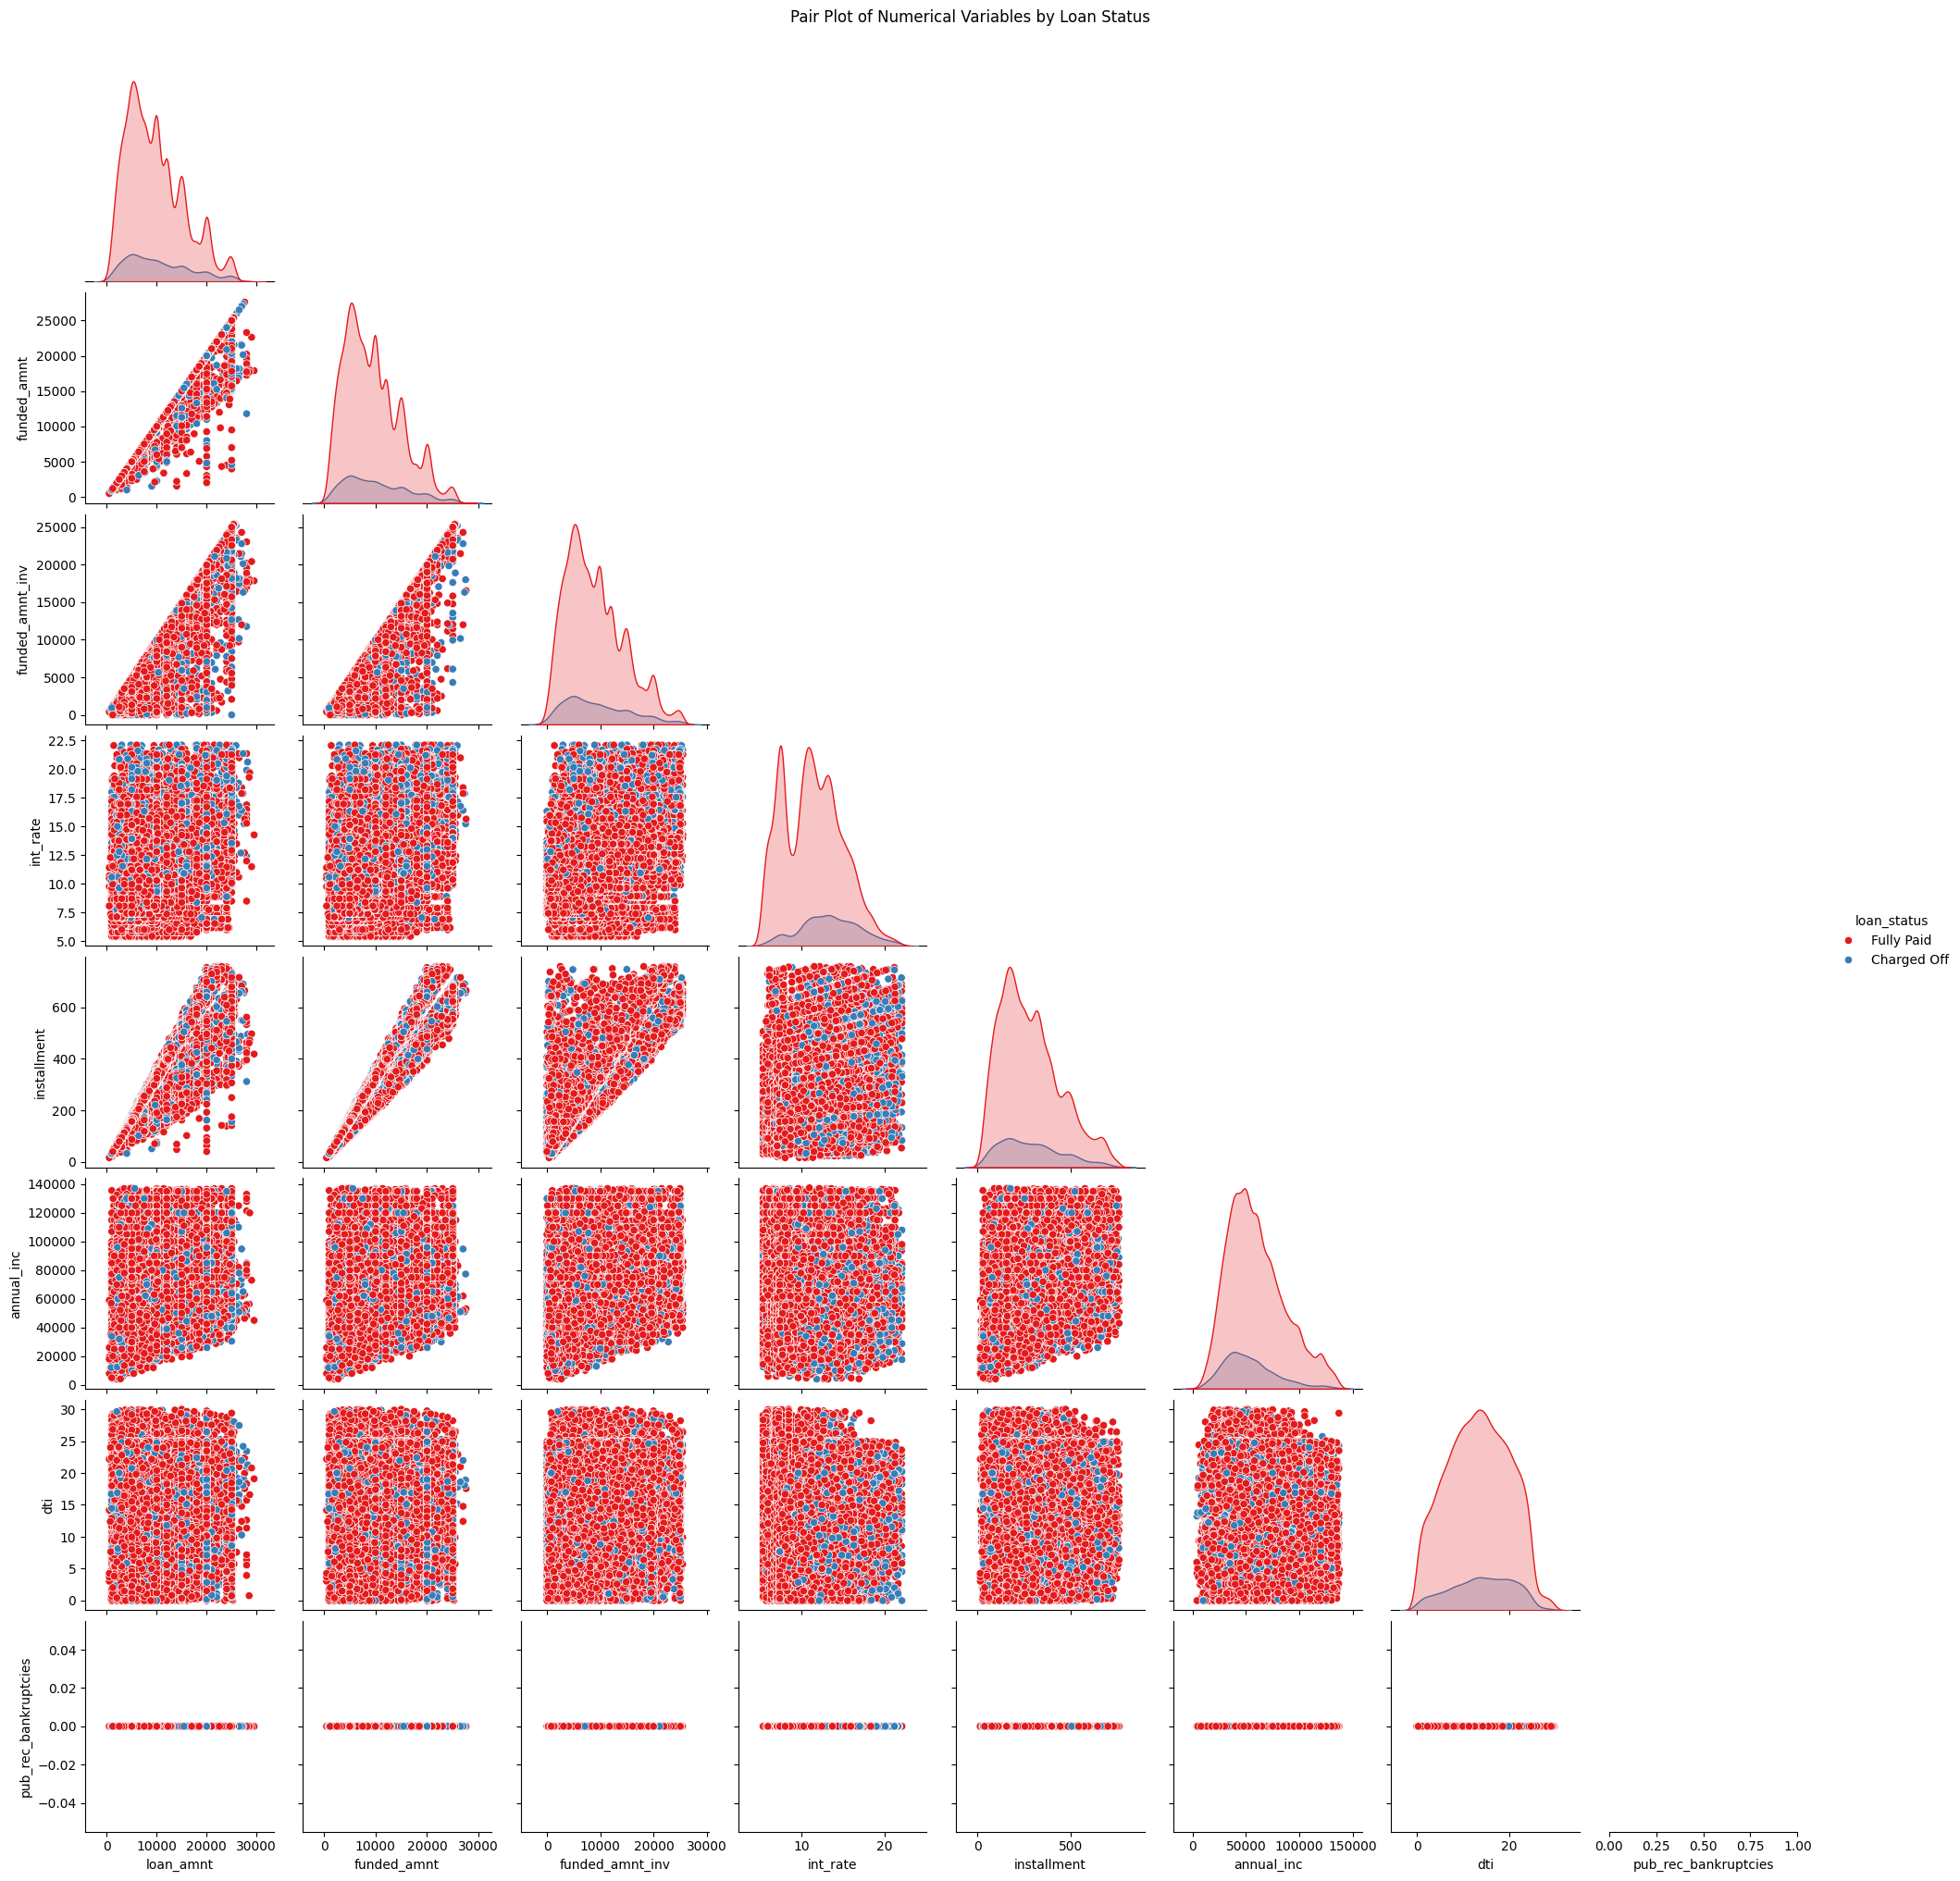

In [ ]:




# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(loan_data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Scatter plots for pairs of highly correlated numerical variables
high_corr_pairs = [('loan_amnt', 'funded_amnt'), ('funded_amnt', 'funded_amnt_inv'), ('int_rate', 'installment')]
for x, y in high_corr_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=loan_data, x=x, y=y)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Box plots of numerical variables across categories
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=loan_data, x=cat_col, y=num_col)
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

# Pairplot for detailed analysis of numerical columns with hue based on 'loan_status' (or any other categorical variable)
sns.pairplot(loan_data, vars=numerical_cols, hue="loan_status", palette='Set1', corner=True)
plt.suptitle("Pair Plot of Numerical Variables by Loan Status", y=1.02)
plt.show()
